# Import Data dan Package

In [1]:
from cleaning import clean
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
raw_data = pd.read_csv("appstore_ID_JUMAT10JAN2020.csv")

In [3]:
raw_data.head()

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size
0,4+,3.0,\n Books\n,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",Free,NaN,1 Rating,14.3 MB
1,4+,4.7,\n Business\n,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,Free,191.0,9 Ratings,148 MB
2,4+,2.6,\n Finance\n,Requires iOS 9.0 or later. Compatible with iPh...,NaN,OctaFX cTrader,Free,166.0,5 Ratings,190.1 MB
3,4+,4.5,\n Entertainment\n ...,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,Free,NaN,768 Ratings,113 MB
4,4+,4.6,\n Education\n,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,Free,NaN,12 Ratings,245.7 MB


In [14]:
df.head(50)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",Free,NaN,1.0,14.3,1,False,False
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,Free,191.0,9.0,148.0,7,True,False
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,Free,166.0,5.0,190.1,0,True,False
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,Free,NaN,768.0,113.0,11,False,False
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,Free,NaN,12.0,245.7,1,False,False
5,9,4.6,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Yu-Gi-Oh! Duel Links,Free,27.0,898.0,201.3,11,True,False
6,4,0.0,Food & Drink,Requires iOS 7.0 or later. Compatible with iPh...,English,Resep Daging Indonesia,Free,NaN,0.0,19.5,1,False,False
7,4,3.9,Lifestyle,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Czech, Finnish, French, Germa...",FunDo Pro,Free,134.0,79.0,185.6,18,True,False
8,1,5.0,Medical,Requires iOS 10.3 or later. Compatible with iP...,English,Pocket Pharmacist,Free,NaN,1.0,64.7,1,False,False
9,1,5.0,Health & Fitness ...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Dutch, French, German, Italian, Russi...",Calorie-Calculator,Free,NaN,2.0,16.7,7,False,False


In [4]:
raw_data.replace({'price': {'Free': 0}},inplace=True)


In [5]:
df = clean(raw_data) #importing preprocessing functions(clean) from the cleaning.py file 

In [6]:
df['price'] = df['price'].apply(lambda x:x.replace('Rp', ''))
df['price'] = df['price'].apply(lambda x:x.replace('ribu', '000'))

In [7]:
df["category"] = df["category"].astype(str)
df["category"] = df["category"].apply(lambda x:x.replace('\n', ""))


In [8]:
df['age_rating'] = df['age_rating'].apply(lambda x:x.replace("\d+",x)[0])

In [9]:
df['size'] = df['size'].astype(float)

In [10]:
df['price']= df['price'].apply(float)

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 10 columns):
age_rating       5438 non-null object
app_rating       5094 non-null float64
category         5438 non-null object
compatibility    5438 non-null object
languages        5419 non-null object
name             5438 non-null object
price            5438 non-null object
rank             3238 non-null float64
rating_count     5094 non-null object
size             5438 non-null object
dtypes: float64(2), object(8)
memory usage: 425.0+ KB


In [11]:
df.head()

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True


# Pengecekan Distribusi Data

In [12]:
df.cov()

,app_rating,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
app_rating,1.781477,1.655655e+02,-7.122265,1.916319e+03,28.603497,2.020689,0.082289,0.0
price,165.565527,4.961742e+07,-42865.136986,-7.153106e+05,1993.676526,743.215188,135.001123,0.0
rank,-7.122265,-4.286514e+04,3169.750432,-2.606435e+05,-643.146205,-67.177277,0.000000,0.0
rating_count,1916.319171,-7.153106e+05,-260643.475120,8.073163e+08,207978.795544,33297.206742,922.385350,0.0
size,28.603497,1.993677e+03,-643.146205,2.079788e+05,12711.394625,200.923855,7.147733,0.0
num_languages,2.020689,7.432152e+02,-67.177277,3.329721e+04,200.923855,134.014346,0.599811,0.0
boolean_rank,0.082289,1.350011e+02,0.000000,9.223853e+02,7.147733,0.599811,0.240936,0.0
free_or_not,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0


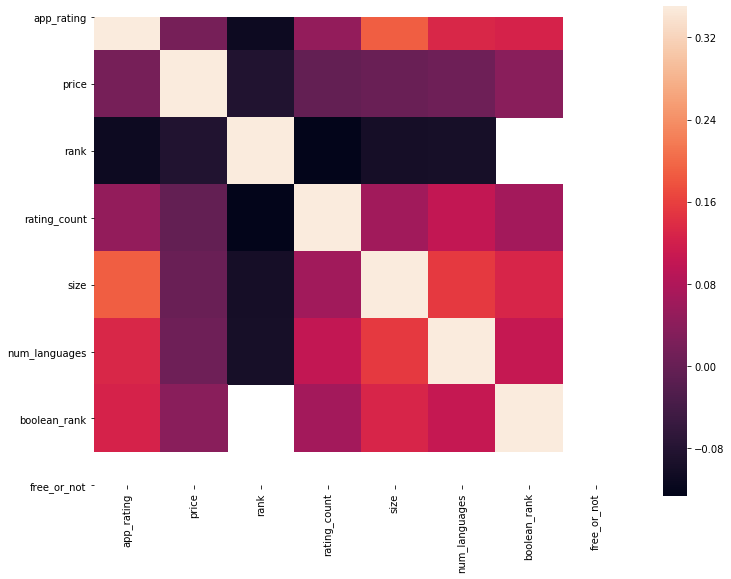

In [13]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.35, square=True);

In [14]:
df.corr()

,app_rating,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
app_rating,1.000000,0.017610,-0.109425,0.050531,0.190078,0.130778,0.125604,NaN
price,0.017610,1.000000,-0.083594,-0.003574,0.002510,0.009114,0.039045,NaN
rank,-0.109425,-0.083594,1.000000,-0.126005,-0.098398,-0.096406,NaN,NaN
rating_count,0.050531,-0.003574,-0.126005,1.000000,0.064923,0.101230,0.066136,NaN
size,0.190078,0.002510,-0.098398,0.064923,1.000000,0.153943,0.129158,NaN
num_languages,0.130778,0.009114,-0.096406,0.101230,0.153943,1.000000,0.105557,NaN
boolean_rank,0.125604,0.039045,NaN,0.066136,0.129158,0.105557,1.000000,NaN
free_or_not,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Total app in each category')

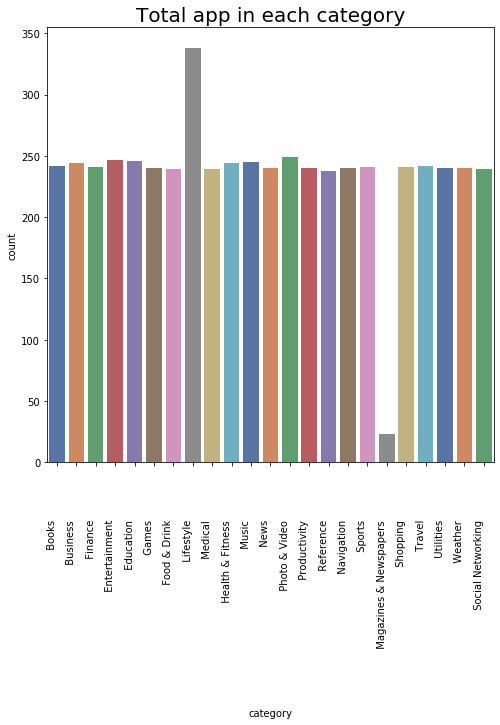

In [15]:
#distribution of app each category
plt.figure(figsize=(8,8))
g = sns.countplot(x="category",data=df, palette = "deep")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g
plt.title('Total app in each category',size = 20)

Text(0.5, 1.0, 'Total app in each price category')

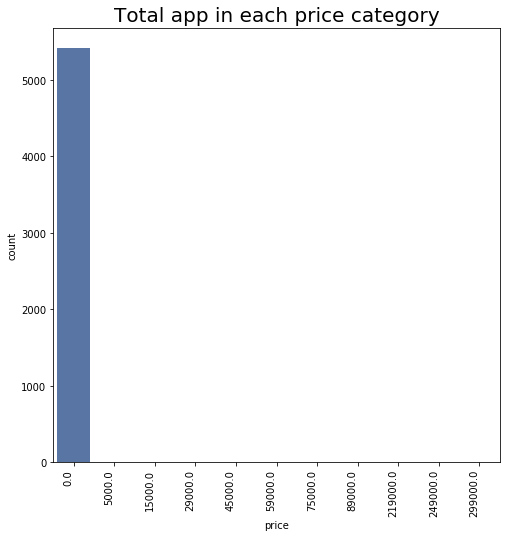

In [16]:
#distribution of app prices each category
plt.figure(figsize=(8,8))
g = sns.countplot(x="price",data=df, palette = "deep")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g
plt.title('Total app in each price category',size = 20)

Text(0.5, 0, 'Size (MB)')

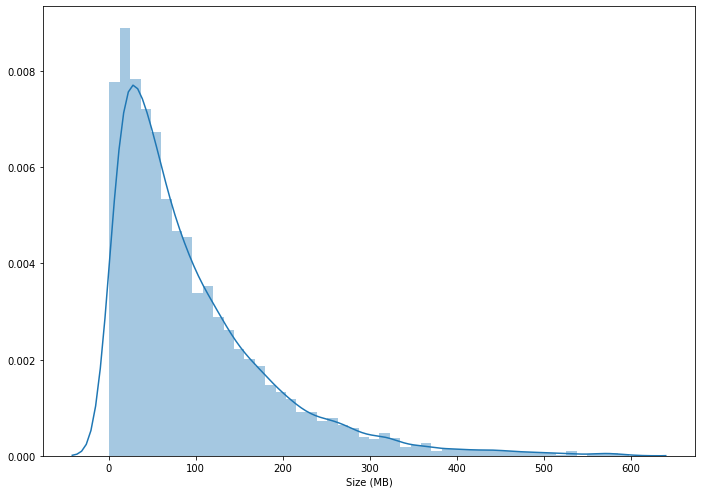

In [17]:
#distribution of apps size in the apps store.
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.distplot(df[df['size']<600]['size']).set_xlabel('Size (MB)')


(0, 500)

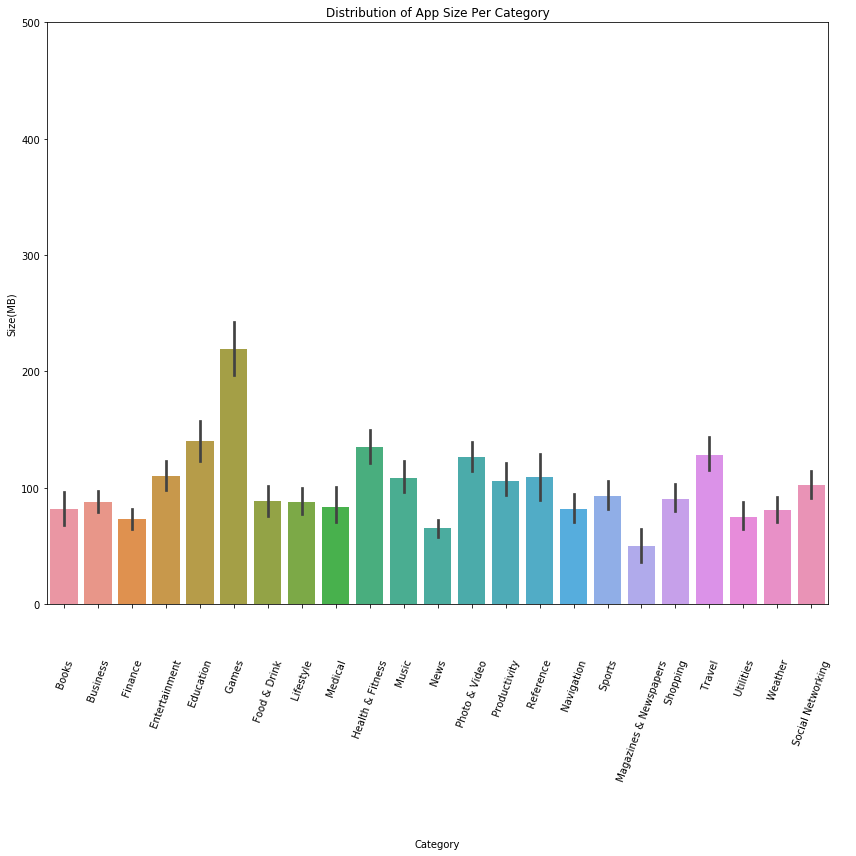

In [18]:
#distribution of apps size per category.

a4_dims = (14, 10.7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.barplot(data = df, x ='category',y='size',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Distribution of App Size Per Category')
ax.set_ylabel('Size(MB)')
ax.set_xlabel('Category')
plt.ylim(0,500)


(0, 30000)

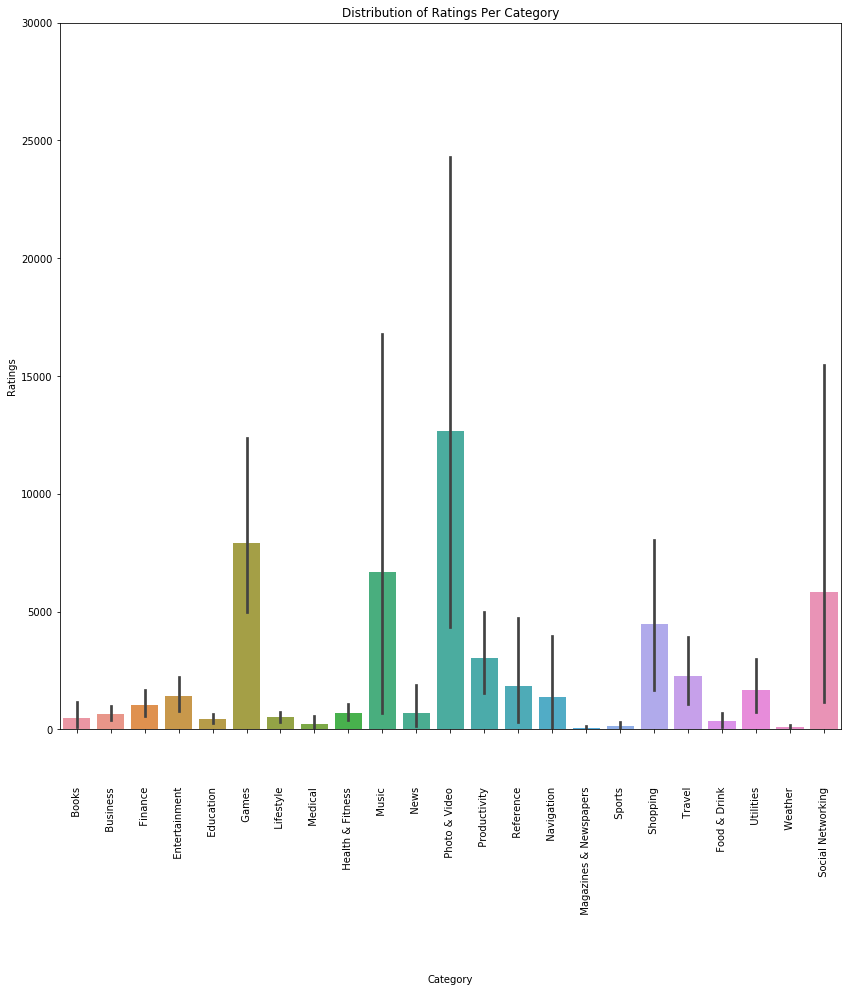

In [19]:
a4_dims = (14, 13)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.barplot(data = df[df['rating_count']!=0], x ='category',y='rating_count',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Distribution of Ratings Per Category')
ax.set_ylabel('Ratings')
ax.set_xlabel('Category')
plt.ylim(0,30000)



In [20]:
df['free_or_not']=df['price']== 0

Text(336.9714285714286, 0.5, 'App Rating')

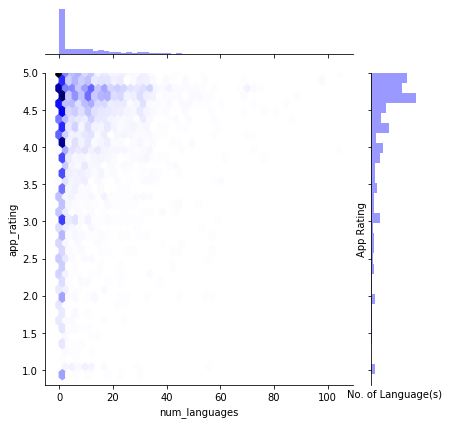

In [21]:

sns.jointplot('num_languages','app_rating',data=df,kind ="hex",space=0.4,color="blue")
plt.ylim(0.8,5)
plt.xlabel("No. of Language(s)")
plt.ylabel("App Rating")


In [22]:
app_rating_per_age= df.groupby('age_rating').agg({'app_rating':'mean'}).reset_index().sort_values(by='app_rating')

In [23]:
app_rating_per_age

,age_rating,app_rating
3,N,2.500000
1,4,3.881642
0,1,3.943053
2,9,4.089720


In [24]:
df.groupby('age_rating').agg({'rating_count':'sum'})

,rating_count
age_rating,
1,6624019.0
4,6239785.0
9,191972.0
N,17.0


In [25]:
avg_app_rating_df =df.groupby('category').agg({'app_rating':'mean'}).sort_values(by='app_rating').reset_index()

In [26]:
avg_app_rating_df.head(5)

,category,app_rating
0,Magazines & Newspapers ...,2.969565
1,Food & Drink,3.173222
2,Weather,3.227500
3,Navigation,3.575000
4,Medical,3.579079


Text(0.5, 0, 'Category')

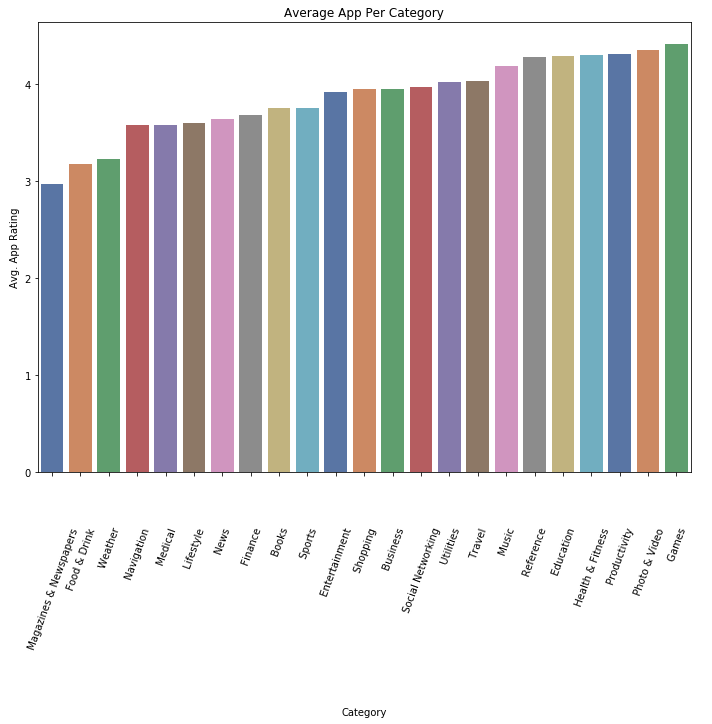

In [27]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data=avg_app_rating_df, y='app_rating',x='category',palette="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Average App Per Category')
ax.set_ylabel('Avg. App Rating')
ax.set_xlabel('Category')

In [28]:
rating_count_per_age =df.sort_values(by='rating_count', ascending =False).groupby('age_rating').agg({'rating_count':'sum'}).reset_index() #the most ratings

In [29]:
rating_count_per_age

,age_rating,rating_count
0,1,6624019.0
1,4,6239785.0
2,9,191972.0
3,N,17.0


Text(0.5, 0, 'Age Rating')

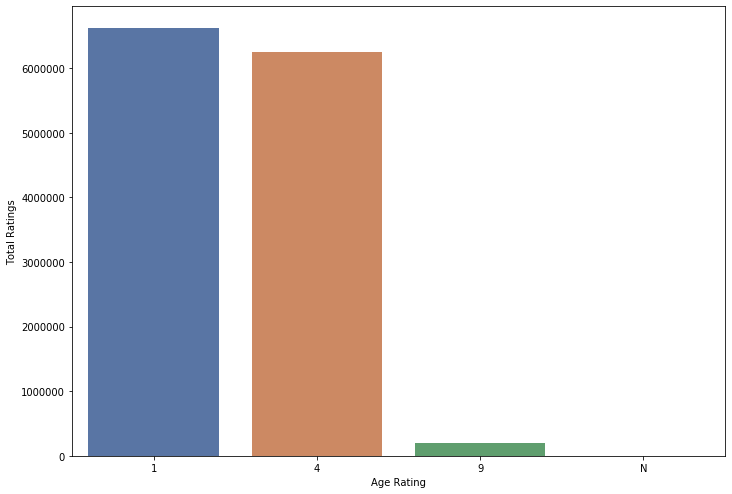

In [30]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data= rating_count_per_age,x ='age_rating',y='rating_count',palette="deep")
plot.set_title('Total Ratings per Age Rating')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Age Rating')


In [31]:
df.sort_values(by='rank').groupby('rank')

Text(0.5, 0, 'App Store Rank')

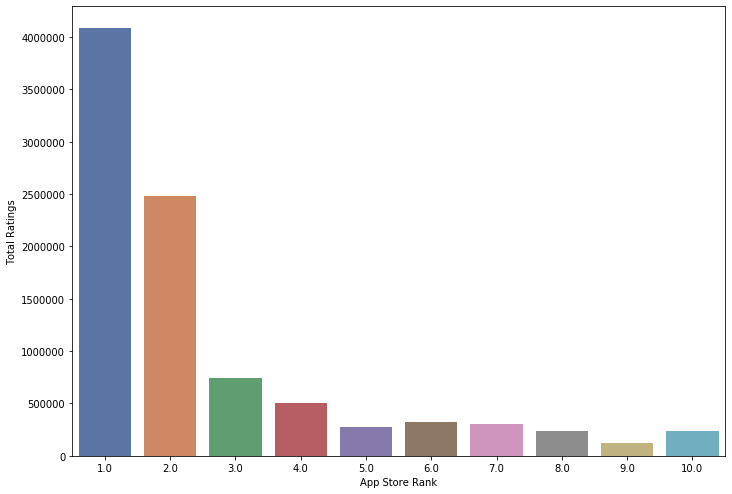

In [32]:
top_ratings_per_rank =df[df['rank']<=10].sort_values('rank').groupby('rank').agg({'rating_count':'sum'}).reset_index()
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data =top_ratings_per_rank,x='rank',y='rating_count',palette="deep")
plot.set_title('Total Ratings of Top 10 Ranked Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('App Store Rank')






#apps with a top 5 rank

In [33]:
df.assign(free_boolean =df['price']=='Free').head(5)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not,free_boolean
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True,False
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True,False
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True,False
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True,False
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True,False


In [102]:
df.assign(toprankGross = ((df["rating_count"]!=0) & (df["price"]!=0)).head())

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not,toprankGross
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True,False
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True,False
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True,False
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True,False
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,4,3.7,Shopping,Requires iOS 12.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Catalan, Croatian,...",ZARA,0.0,20.0,322.0,62.0,35,True,True,NaN
5434,4,3.0,Shopping,Requires iOS 9.1 or later. Compatible with iPh...,English,Berrybenka,0.0,43.0,290.0,17.8,1,True,True,NaN
5435,4,4.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Malay, Thai, Traditional ...",ShopBack - Cashback & Coupons,0.0,15.0,25900.0,163.1,6,True,True,NaN
5436,1,4.0,Shopping,Requires iOS 8.0 or later. Compatible with iPh...,Indonesian,elevenia - yang kamu cari ada,0.0,88.0,322.0,131.1,1,True,True,NaN


In [37]:
df('toprankGross').head() 

TypeError: 'DataFrame' object is not callable

In [35]:
df['toprankGross'] = df['toprankGross'].sort_values(by='toprankGrossk',bool=True)

KeyError: 'toprankGross'

In [ ]:
df['size'] = df['size'].astype(float)

In [44]:
df

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,4,3.7,Shopping,Requires iOS 12.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Catalan, Croatian,...",ZARA,0.0,20.0,322.0,62.0,35,True,True
5434,4,3.0,Shopping,Requires iOS 9.1 or later. Compatible with iPh...,English,Berrybenka,0.0,43.0,290.0,17.8,1,True,True
5435,4,4.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Malay, Thai, Traditional ...",ShopBack - Cashback & Coupons,0.0,15.0,25900.0,163.1,6,True,True
5436,1,4.0,Shopping,Requires iOS 8.0 or later. Compatible with iPh...,Indonesian,elevenia - yang kamu cari ada,0.0,88.0,322.0,131.1,1,True,True


In [51]:
rank_count_df= df.groupby('rank').agg({'rating_count':'sum'}).sort_values('rank',ascending =True)

In [52]:
tga = rank_count_df

In [53]:
tga

,rank,rating_count
0,1.0,4089494.0
1,2.0,2477228.0
2,3.0,739360.0
3,4.0,507001.0
4,5.0,276101.0
...,...,...
195,196.0,1634.0
196,197.0,1227.0
197,198.0,646.0
198,199.0,489.0


In [86]:
df['COUNTER'] =1       #initially, set that counter to 1.
tga1 = df.groupby(['price','rating_count','rank'])['COUNTER'].sum() #sum function
print(tga1)

price     rating_count  rank
0.0       0.0           17.0    1
                        24.0    1
                        26.0    1
                        27.0    1
                        28.0    1
                               ..
75000.0   1800.0        6.0     1
89000.0   12.0          6.0     1
219000.0  1100.0        8.0     1
249000.0  7.0           9.0     1
299000.0  459.0         8.0     1
Name: COUNTER, Length: 3057, dtype: int64


In [16]:
tga2 = df.groupby(['price','rating_count','rank']).size().reset_index().groupby('rank').sum()

In [17]:
tga2

,price,rating_count,0
rank,,,
1.0,150000.0,4087794.0,35
2.0,209000.0,2473828.0,35
3.0,104000.0,737260.0,32
4.0,134000.0,507001.0,30
5.0,34000.0,271501.0,29
...,...,...,...
196.0,0.0,1632.0,9
197.0,0.0,1226.0,7
198.0,0.0,646.0,6


In [66]:
price_count_df= df.groupby('price').agg({'rating_count':'sum'}).reset_index().sort_values('price',ascending =True)

In [67]:
tpa = price_count_df

In [68]:
tpa

,price,rating_count
0,0.0,13049818.0
1,5000.0,14.0
2,15000.0,249.0
3,29000.0,348.0
4,45000.0,873.0
5,59000.0,860.0
6,75000.0,2053.0
7,89000.0,12.0
8,219000.0,1100.0
9,249000.0,7.0


In [81]:
rating_count_df= df.groupby('category').agg({'rating_count':'sum'}).reset_index().sort_values('rating_count',ascending =False)

In [82]:
rating_count_df

,category,rating_count
14,Photo & Video,3143900.0
6,Games,1897302.0
11,Music,1609575.0
18,Social Networking ...,1383191.0
17,Shopping,1067173.0
15,Productivity,724617.0
20,Travel,528944.0
16,Reference,435930.0
21,Utilities,396688.0
3,Entertainment,342588.0


Text(0.5, 0, 'Category')

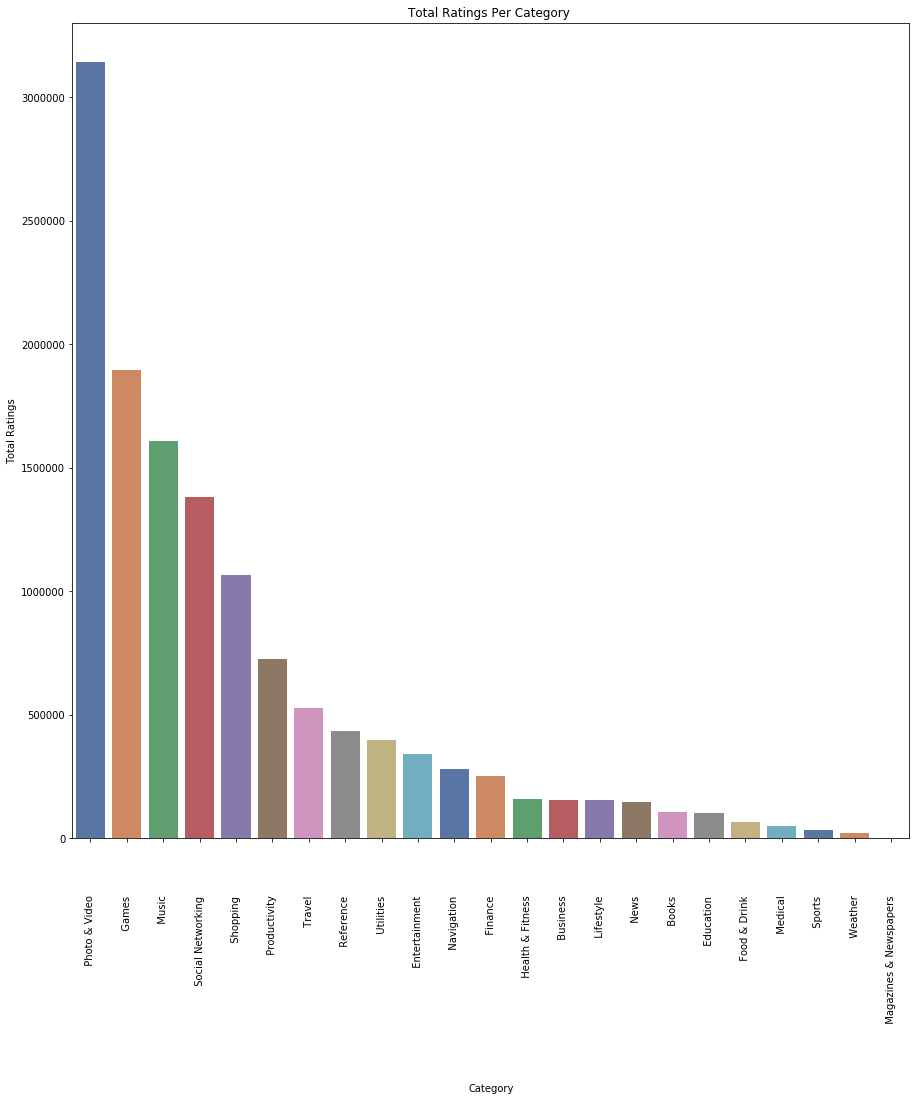

In [51]:
#Most Ratings Per Category


a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot= sns.barplot(x="category", y="rating_count", data=rating_count_df,palette ="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Total Ratings Per Category ')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Category')


(10, 650000)

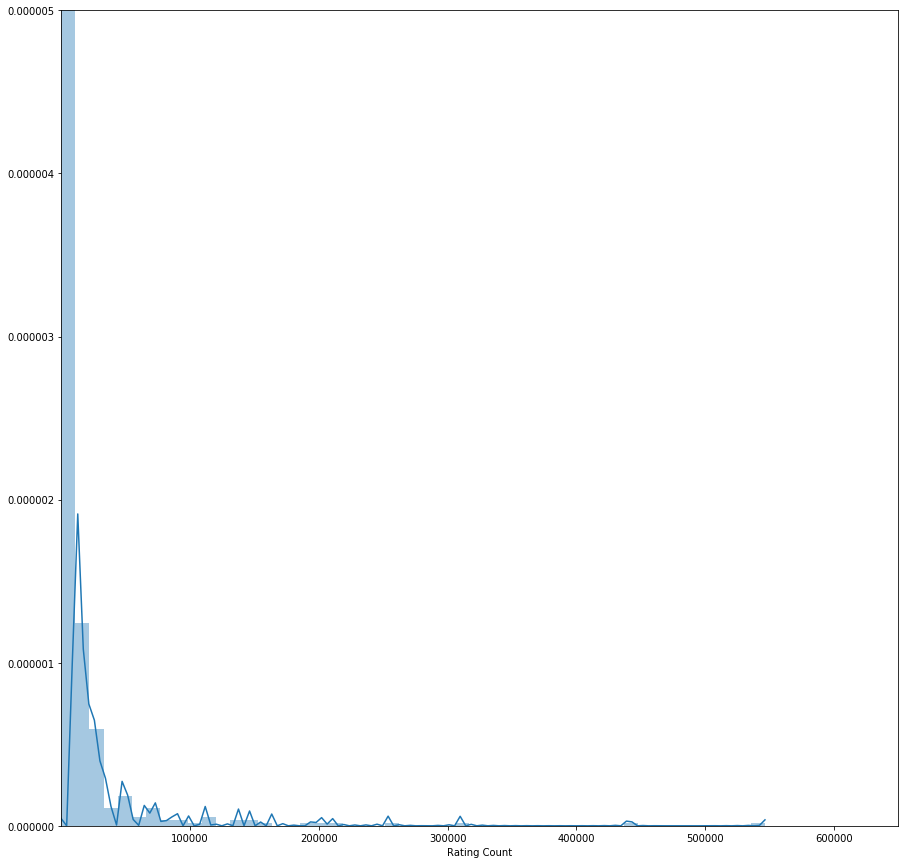

In [52]:
#Density of Rating Count

a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.distplot(df[(df['rating_count']!=0)& (df['rating_count']< 600000)]['rating_count']).set_xlabel('rating count')

ax.set_xlabel('Rating Count')
plt.ylim(0,0.000005)
plt.xlim(10,650000)



In [53]:
df.head(25)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True
5,9,4.6,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Yu-Gi-Oh! Duel Links,0.0,27.0,898.0,201.3,11,True,True
6,4,0.0,Food & Drink,Requires iOS 7.0 or later. Compatible with iPh...,English,Resep Daging Indonesia,0.0,NaN,0.0,19.5,1,False,True
7,4,3.9,Lifestyle,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Czech, Finnish, French, Germa...",FunDo Pro,0.0,134.0,79.0,185.6,18,True,True
8,1,5.0,Medical,Requires iOS 10.3 or later. Compatible with iP...,English,Pocket Pharmacist,0.0,NaN,1.0,64.7,1,False,True
9,1,5.0,Health & Fitness ...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Dutch, French, German, Italian, Russi...",Calorie-Calculator,0.0,NaN,2.0,16.7,7,False,True


# TOP PAID AND TOP FREE EDA

## Disini dijabarkan mengenai hasil cross-column antara category dengan rating tertentu untuk mencari pattern pada masing-masing data


# top paid app

In [25]:
df = df[(df["category"] !=        '                                  ') & (df["price"]!=0)].sort_values(by='rating_count',ascending=False)
df.head(30)



,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
118,4,4.9,Reference,Requires iOS 9.3 and watchOS 2.0 or later. Com...,"English, Arabic, Bengali, Dutch, French, Germa...",Quran Majeed Proالقرآن المجيد,75000.0,6.0,1800.0,185.2,21,True,True
3584,4,4.9,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Hindi, Italian...",iScanner - PDF Scanner App,219000.0,8.0,1100.0,116.2,14,True,True
102,4,4.7,Reference,Requires iOS 10.3 or later. Compatible with iP...,"English, Arabic",iQuran Pro,45000.0,3.0,873.0,209.0,2,True,True
3578,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Scanner Pro: PDF Scanner App,59000.0,4.0,697.0,159.5,9,True,True
23,4,4.7,Reference,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Speak & Translate: Translator,299000.0,8.0,459.0,85.6,19,True,True
46,4,4.6,Reference,Requires iOS 3.2 or later. Compatible with iPad.,"English, Arabic",iQuran HD,29000.0,NaN,342.0,78.2,2,False,True
4550,4,4.6,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, Thai",Pastel Keyboard Themes Color,15000.0,20.0,232.0,192.3,2,True,True
4198,4,4.7,Weather,Requires iOS 8.0 and watchOS 3.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Weather Radar: Forecast,75000.0,4.0,111.0,96.2,18,True,True
3892,4,4.3,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Al-Quran. 114 Surah. Indonesia,75000.0,2.0,107.0,1.9,2,True,True
4229,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather+,59000.0,3.0,91.0,136.1,11,True,True


In [26]:
df['rankpaid'] = range(1, len(df) + 1)
df.head(30)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not,rankpaid
118,4,4.9,Reference,Requires iOS 9.3 and watchOS 2.0 or later. Com...,"English, Arabic, Bengali, Dutch, French, Germa...",Quran Majeed Proالقرآن المجيد,75000.0,6.0,1800.0,185.2,21,True,True,1
3584,4,4.9,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Hindi, Italian...",iScanner - PDF Scanner App,219000.0,8.0,1100.0,116.2,14,True,True,2
102,4,4.7,Reference,Requires iOS 10.3 or later. Compatible with iP...,"English, Arabic",iQuran Pro,45000.0,3.0,873.0,209.0,2,True,True,3
3578,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Scanner Pro: PDF Scanner App,59000.0,4.0,697.0,159.5,9,True,True,4
23,4,4.7,Reference,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Speak & Translate: Translator,299000.0,8.0,459.0,85.6,19,True,True,5
46,4,4.6,Reference,Requires iOS 3.2 or later. Compatible with iPad.,"English, Arabic",iQuran HD,29000.0,NaN,342.0,78.2,2,False,True,6
4550,4,4.6,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, Thai",Pastel Keyboard Themes Color,15000.0,20.0,232.0,192.3,2,True,True,7
4198,4,4.7,Weather,Requires iOS 8.0 and watchOS 3.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Weather Radar: Forecast,75000.0,4.0,111.0,96.2,18,True,True,8
3892,4,4.3,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Al-Quran. 114 Surah. Indonesia,75000.0,2.0,107.0,1.9,2,True,True,9
4229,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather+,59000.0,3.0,91.0,136.1,11,True,True,10


In [30]:
df = df[(df["rating_count"]!=0) & (df["price"]!='')].sort_values(by=['rank','rating_count'],ascending =[True,False])
df.head(30)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not,rankpaid
4215,4,4.9,Weather,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Living Earth - Clock & Weather,75000.0,1.0,17.0,177.9,11,True,True,13
3902,4,2.0,Books,Requires iOS 5.1.1 or later. Compatible with i...,English,Kamus Lengkap - English N' Indonesia Dictionary,75000.0,1.0,1.0,16.5,1,True,True,24
3892,4,4.3,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Al-Quran. 114 Surah. Indonesia,75000.0,2.0,107.0,1.9,2,True,True,9
2642,4,4.4,Food & Drink,Requires iOS 10.3 or later. Compatible with iP...,English,Annabel Karmel,59000.0,2.0,36.0,120.9,1,True,True,11
4131,1,4.9,Weather,Requires iOS 12.0 and watchOS 4.0 or later. Co...,English,CARROT Weather,75000.0,2.0,17.0,152.8,1,True,True,12
102,4,4.7,Reference,Requires iOS 10.3 or later. Compatible with iP...,"English, Arabic",iQuran Pro,45000.0,3.0,873.0,209.0,2,True,True,3
4229,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather+,59000.0,3.0,91.0,136.1,11,True,True,10
3578,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Scanner Pro: PDF Scanner App,59000.0,4.0,697.0,159.5,9,True,True,4
4198,4,4.7,Weather,Requires iOS 8.0 and watchOS 3.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Weather Radar: Forecast,75000.0,4.0,111.0,96.2,18,True,True,8
4118,4,4.8,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Danish, Dutch, Finnish, French, Germa...",WeatherPro,5000.0,5.0,14.0,104.0,12,True,True,16


In [31]:
df['rankgrossing'] = range(1, len(df) + 1)
df.head(30)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not,rankpaid,rankgrossing
4215,4,4.9,Weather,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Living Earth - Clock & Weather,75000.0,1.0,17.0,177.9,11,True,True,13,1
3902,4,2.0,Books,Requires iOS 5.1.1 or later. Compatible with i...,English,Kamus Lengkap - English N' Indonesia Dictionary,75000.0,1.0,1.0,16.5,1,True,True,24,2
3892,4,4.3,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Al-Quran. 114 Surah. Indonesia,75000.0,2.0,107.0,1.9,2,True,True,9,3
2642,4,4.4,Food & Drink,Requires iOS 10.3 or later. Compatible with iP...,English,Annabel Karmel,59000.0,2.0,36.0,120.9,1,True,True,11,4
4131,1,4.9,Weather,Requires iOS 12.0 and watchOS 4.0 or later. Co...,English,CARROT Weather,75000.0,2.0,17.0,152.8,1,True,True,12,5
102,4,4.7,Reference,Requires iOS 10.3 or later. Compatible with iP...,"English, Arabic",iQuran Pro,45000.0,3.0,873.0,209.0,2,True,True,3,6
4229,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather+,59000.0,3.0,91.0,136.1,11,True,True,10,7
3578,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Scanner Pro: PDF Scanner App,59000.0,4.0,697.0,159.5,9,True,True,4,8
4198,4,4.7,Weather,Requires iOS 8.0 and watchOS 3.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Weather Radar: Forecast,75000.0,4.0,111.0,96.2,18,True,True,8,9
4118,4,4.8,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Danish, Dutch, Finnish, French, Germa...",WeatherPro,5000.0,5.0,14.0,104.0,12,True,True,16,10


# top paid per category

In [70]:
#Top Paid Games
   
top_paid_games = df[(df["category"] ==        '                  Games                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_games.head(20)


,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


In [64]:
df[(df["category"])].astype(float)

KeyError: "None of [Index(['                  Books                ',\n       '                  Business                ',\n       '                  Finance                ',\n       '                  Entertainment                ',\n       '                  Education                ',\n       '                  Games                ',\n       '                  Food & Drink                ',\n       '                  Lifestyle                ',\n       '                  Medical                ',\n       '                  Health & Fitness                ',\n       ...\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                '],\n      dtype='object', length=5438)] are in the [columns]"

ValueError: min() arg is an empty sequence

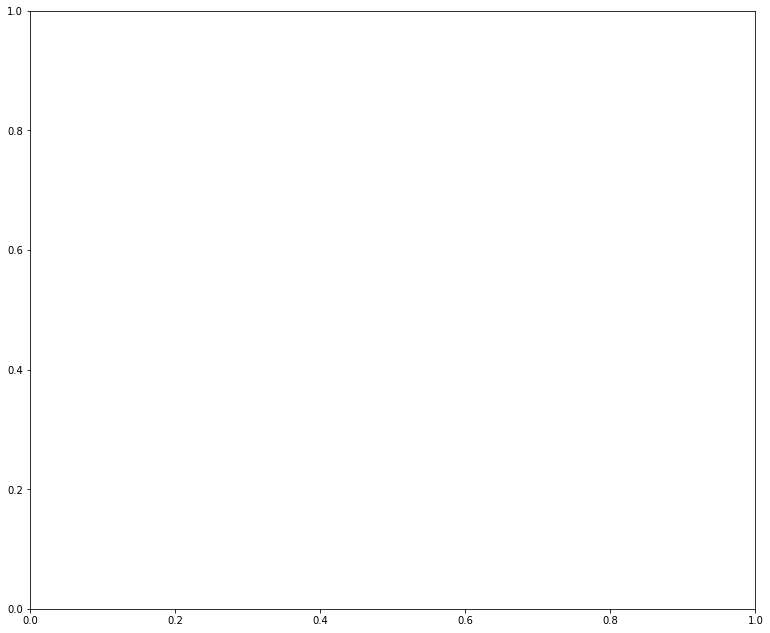

In [72]:
#Top Paid Games

a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_games, x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Paid Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Game')
ax.set_xlabel( '')



In [73]:
top_free_games = df[(df["category"] ==        '                  Games                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_games.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
2579,1,4.5,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Burmese, French, German, Indo...",Mobile Legends: Bang Bang,0.0,1.0,440900.0,288.2,16,True,True
2575,1,4.3,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Chinese, French, German, Indo...",PUBG MOBILE,0.0,3.0,113100.0,2.4,13,True,True
2558,1,4.6,Games,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Helix Jump,0.0,30.0,88900.0,313.6,9,True,True
2574,4,4.8,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",8 Ball Pool™,0.0,2.0,62400.0,151.6,10,True,True
2599,1,4.7,Games,Requires iOS 9.0 or later. Compatible with iPh...,English,Sniper 3D: Gun Shooting Games,0.0,9.0,49900.0,300.6,1,True,True


Text(0.5, 0, '')

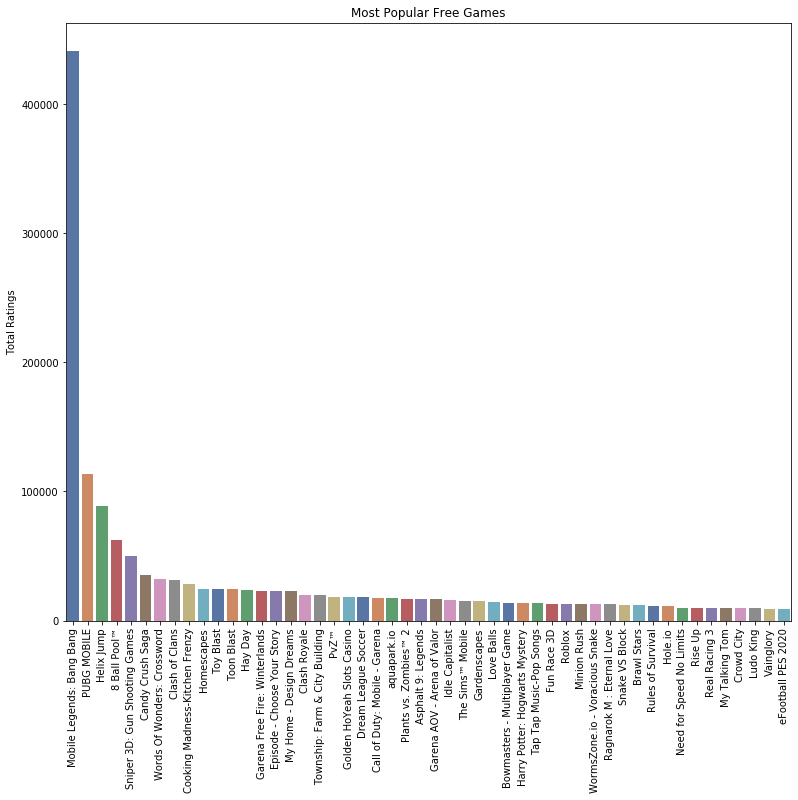

In [74]:
#topfreegames
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_games.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Free Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [43]:
#top paid books
top_paid_books = df[(df["category"] ==        '                  Books                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_books.head(20)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3892,4,4.3,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Al-Quran. 114 Surah. Indonesia,75000.0,2.0,107.0,1.9,2,True,False
3902,4,2.0,Books,Requires iOS 5.1.1 or later. Compatible with i...,English,Kamus Lengkap - English N' Indonesia Dictionary,75000.0,1.0,1.0,16.5,1,True,False


Text(0.5, 0, '')

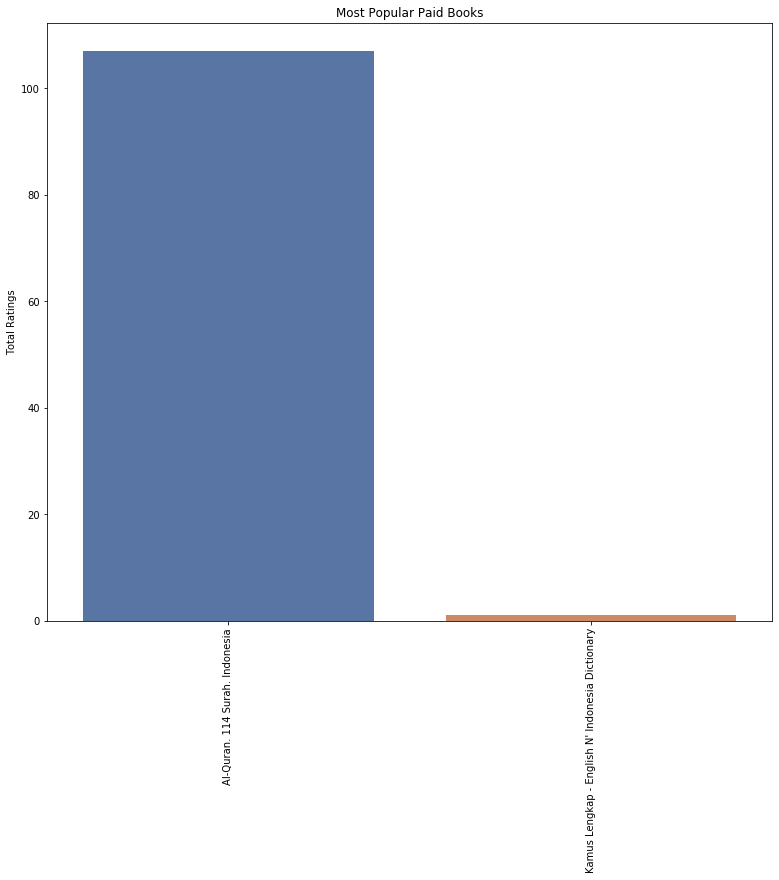

In [44]:
#top paid books
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_books.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Paid Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [45]:
#top free books
top_free_books = df[(df["category"] ==        '                  Books                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_books.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4002,1,4.8,Books,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Czech, Danish, Dutch, Filipin...",Wattpad - Books & Stories,0.0,4.0,65700.0,156.5,26,True,True
3995,1,3.5,Books,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian, Malay, Portuguese, Simpli...",MangaToon-Comics updated Daily,0.0,5.0,7800.0,54.8,9,True,True
3999,1,4.7,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,Dreame - Read Best Romance,0.0,3.0,3200.0,78.2,1,True,True
3977,9,4.8,Books,Requires iOS 10.0 or later. Compatible with iP...,"English, Danish, French, German, Indonesian, J...",Joylada,0.0,37.0,2900.0,230.2,14,True,True
3980,1,4.8,Books,Requires iOS 9.0 or later. Compatible with iPh...,English,WebComics - Daily Manga,0.0,15.0,2700.0,100.6,1,True,True


Text(0.5, 0, '')

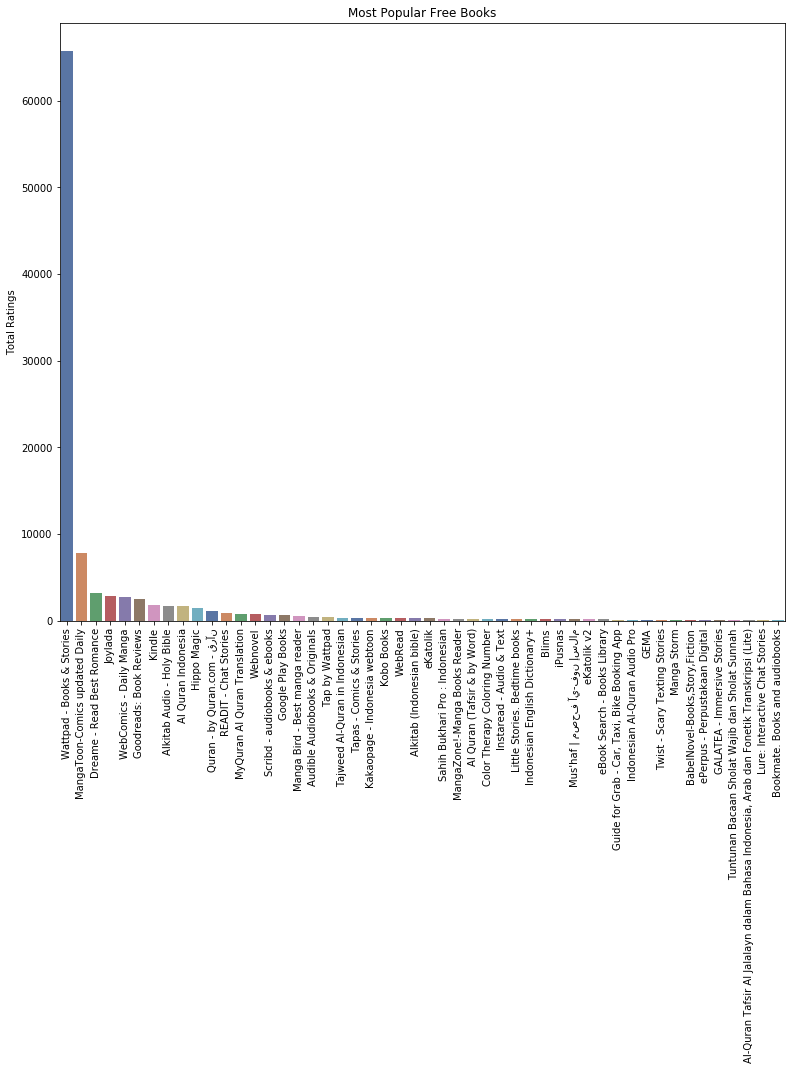

In [46]:
#top free books
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_books.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Free Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [47]:
#top paid social network

top_paid_social_network = df[(df["category"] ==        '                  Social Networking                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_social_network.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

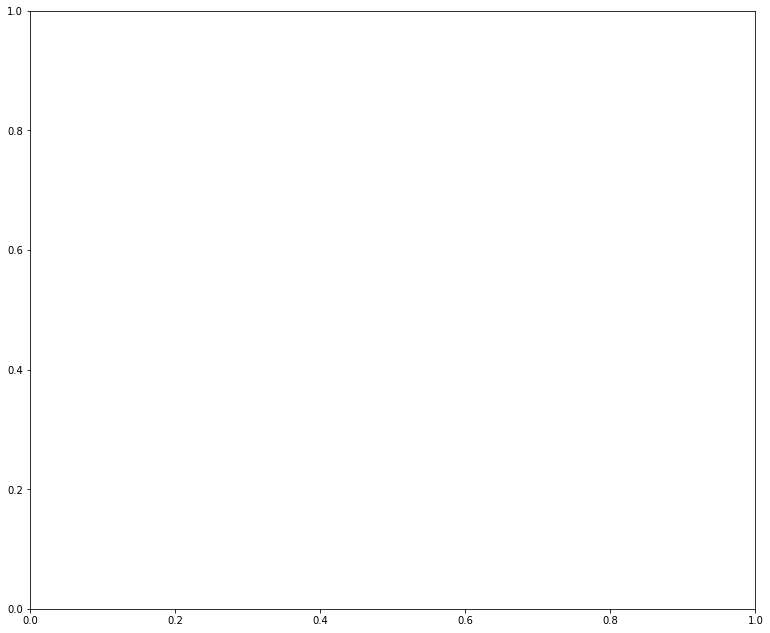

In [48]:
#top paid social network
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_social_network.head(50), x ='name',y ='rating_count',palette="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Paid Popular Social Networks')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [49]:
#top free social network
top_free_social_network = df[(df["category"] ==        '                  Social Networking                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_social_network.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
5208,1,4.8,Social Networking ...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Catalan, Croatian, C...",WhatsApp Messenger,0.0,1.0,936700.0,143.3,39,True,True
5201,1,4.9,Social Networking ...,Requires iOS 9.0 or later. Compatible with iPh...,"English, Czech, Danish, Dutch, Filipino, Finni...",Pinterest: Lifestyle Ideas,0.0,5.0,99200.0,202.9,30,True,True
5204,1,4.4,Social Networking ...,Requires iOS 9.0 and watchOS 4.0 or later. Com...,"English, Croatian, Czech, Danish, Dutch, Finni...",Messenger,0.0,3.0,39400.0,280.3,27,True,True
5191,1,4.9,Social Networking ...,Requires iOS 11.0 or later. Compatible with iP...,"English, Croatian, Danish, Dutch, Filipino, Fi...",Zenly - Best Friends Only,0.0,8.0,35100.0,210.8,28,True,True
5205,1,3.2,Social Networking ...,Requires iOS 11.0 and watchOS 4.0 or later. Co...,"English, Arabic, French, German, Greek, Hindi,...",LINE,0.0,4.0,23000.0,287.8,19,True,True


Text(0.5, 0, '')

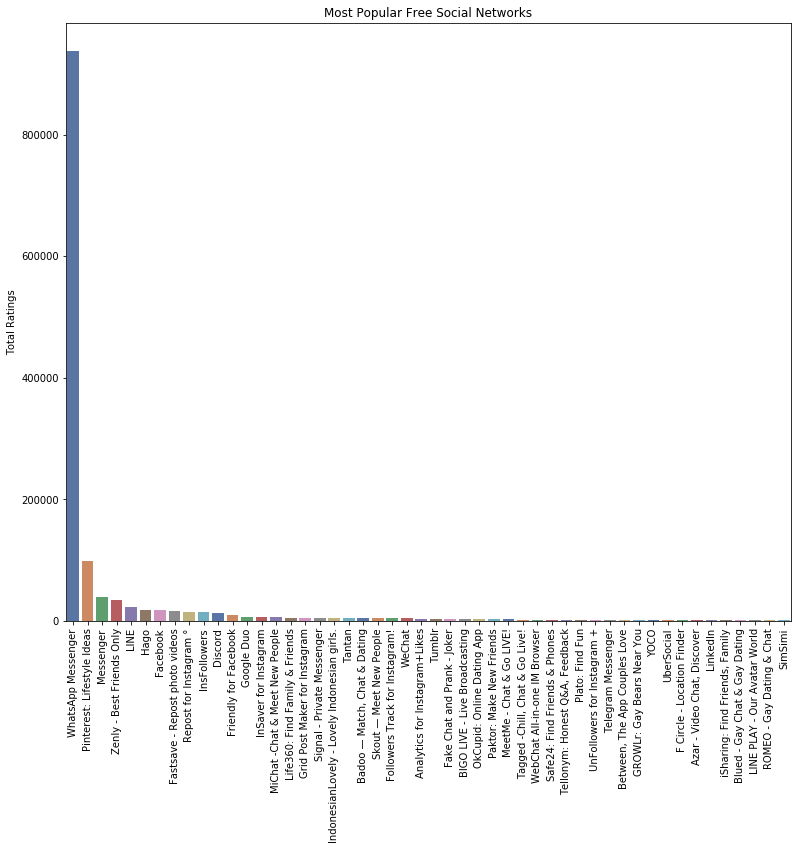

In [50]:
#top free social network
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_social_network.head(50), x ='name',y ='rating_count',palette="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Free Social Networks')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [51]:
#top_paid_productivity
   
top_paid_productivity = df[(df["category"] ==        '                  Productivity                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_productivity.head(20)



,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

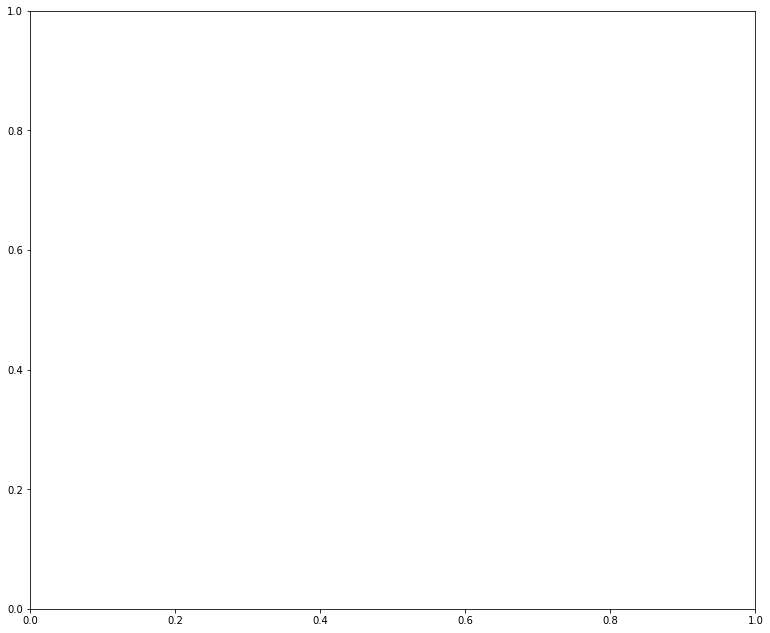

In [52]:
#top_paid_productivity
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_productivity.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Most Popular Paid Productivity Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [53]:
#top_free_productivity
top_free_productivity = df[(df["category"] ==        '                  Productivity                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_productivity.head(20)


,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
489,4,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Amharic, Arabic, Armenian,...",Google Drive – online backup,0.0,3.0,163000.0,182.7,68,True,True
488,4,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Bengali, Bulgarian, Catalan, ...",Yahoo Mail - Organised Email,0.0,12.0,112800.0,229.8,49,True,True
487,4,4.9,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, French, German, Italian, Japa...",CamScanner-Scanner to scan PDF,0.0,8.0,55000.0,171.2,14,True,True
484,1,4.7,Productivity,Requires iOS 9.3 or later. Compatible with iPh...,"English, Arabic, French, Japanese, Korean, Por...",Turbo VPN Private Browser,0.0,4.0,50000.0,52.1,9,True,True
483,4,4.7,Productivity,Requires iOS 9.3 or later. Compatible with iPh...,"English, Arabic, French, German, Indonesian, J...",VPN Proxy Master - Unlimited,0.0,10.0,31700.0,42.8,14,True,True
486,4,4.8,Productivity,Requires iOS 12.0 or later. Compatible with iP...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Microsoft Word,0.0,6.0,31100.0,274.8,33,True,True
476,1,4.8,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Documents by Readdle,0.0,7.0,25700.0,220.6,11,True,True
469,4,4.9,Productivity,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...",Google Sheets,0.0,17.0,24700.0,250.0,70,True,True
480,4,4.8,Productivity,Requires iOS 12.0 or later. Compatible with iP...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Microsoft Excel,0.0,11.0,22500.0,280.1,33,True,True
465,4,4.7,Productivity,Requires iOS 9.0 or later. Compatible with iPh...,"English, Danish, French, German, Indonesian, I...",Speak & Translate - Translator,0.0,43.0,16600.0,138.9,19,True,True


Text(0.5, 0, '')

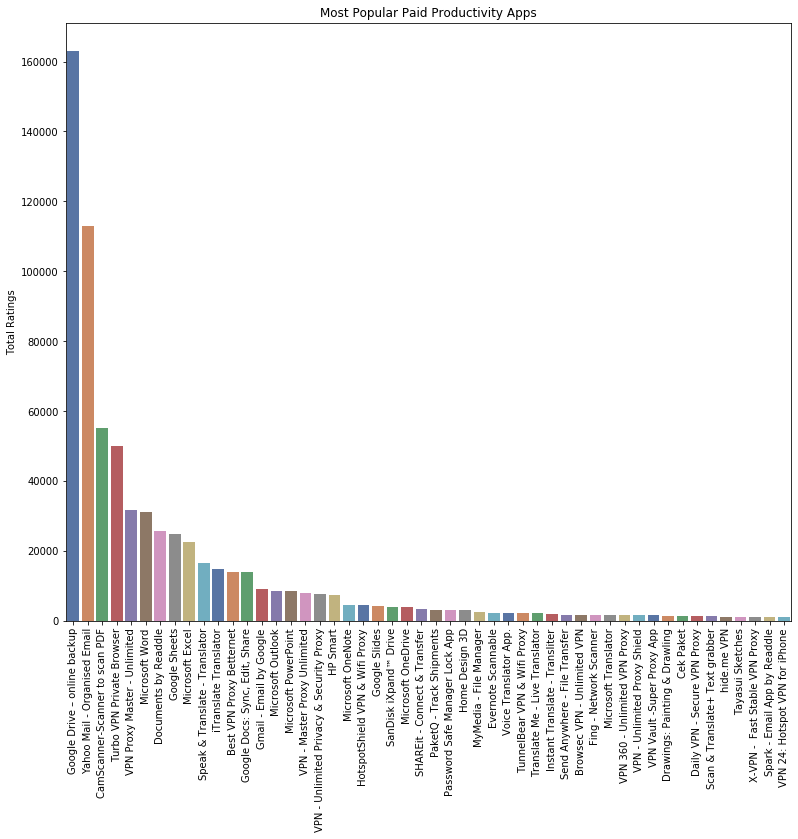

In [54]:
#top_free_productivity
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_productivity.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Paid Productivity Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [55]:
#top paid news
top_paid_news = df[(df["category"] ==        '                  News                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_news.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

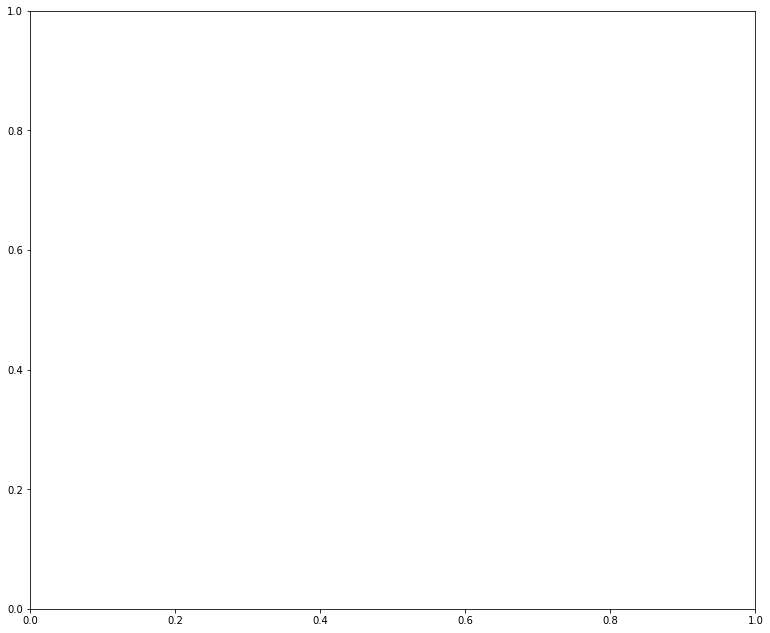

In [56]:
#top paid news
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_news.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Paid News Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [57]:
#top free news
top_free_news = df[(df["category"] ==        '                  News                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_news.head(5)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
1170,1,4.8,News,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Twitter,0.0,1.0,92000.0,122.1,33,True,True
1167,1,4.6,News,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Croatian, Czech, D...",BaBe - Baca Berita Indonesia,0.0,2.0,12100.0,175.9,32,True,True
1154,9,4.7,News,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Indonesian, Italian, ...",Tuner Radio Pro Video Player,0.0,20.0,6200.0,72.4,12,True,True
1150,9,4.5,News,Requires iOS 10.0 and watchOS 2.0 or later. Co...,"English, Arabic, Bulgarian, Croatian, Czech, D...",TopBuzz News: Breaking & Local,0.0,122.0,3200.0,188.1,32,True,True
1165,4,4.8,News,Requires iOS 9.3 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Flipboard: News for our time,0.0,41.0,2300.0,122.5,13,True,True


Text(0.5, 0, '')

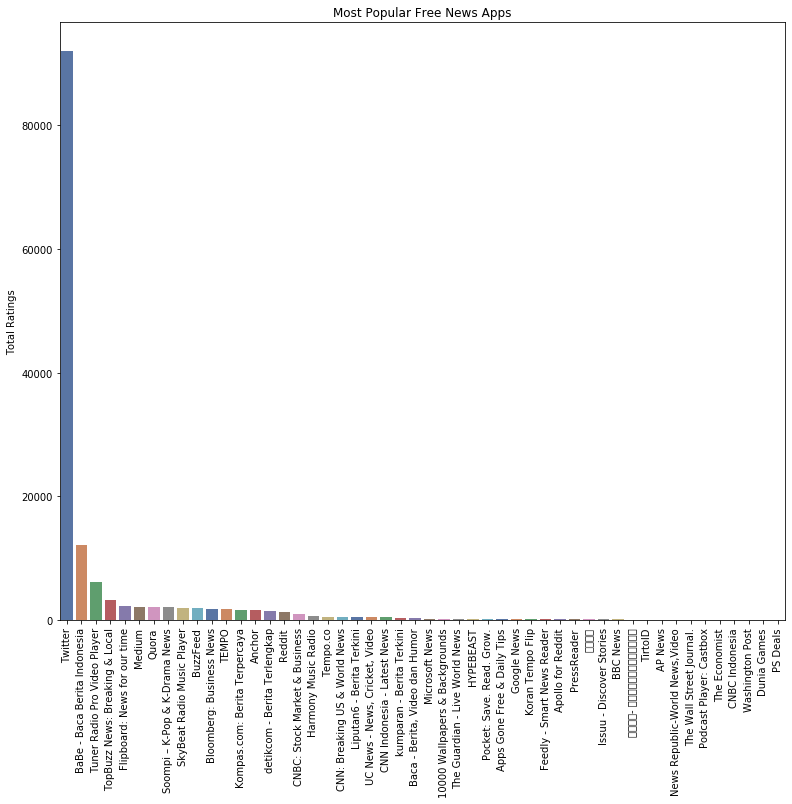

In [59]:
#top free news
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_news.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Most Popular Free News Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [60]:
#top paid fitness
top_paid_fitness_apps = df[(df["category"] ==        '                  Health & Fitness                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_fitness_apps.head(10)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

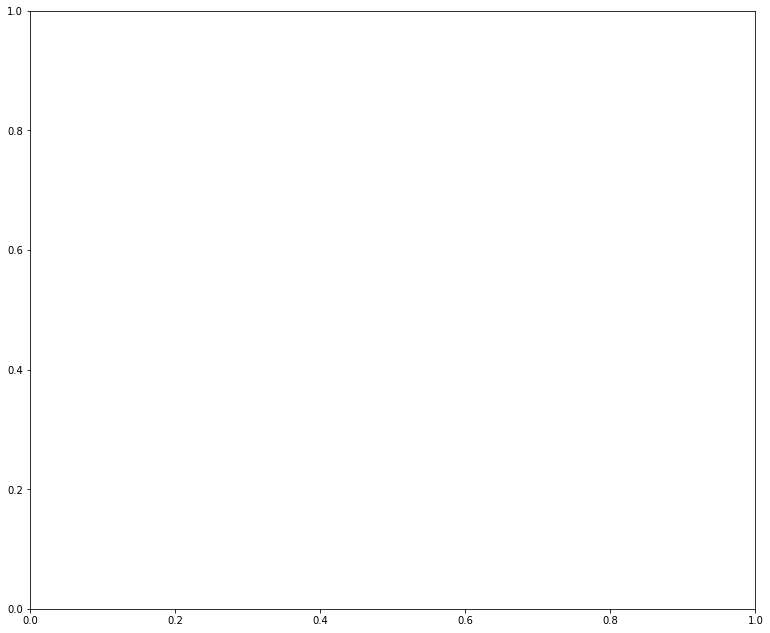

In [61]:
#top paid fitness
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_fitness_apps.head(10), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Top Paid Fitness Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [62]:
#top free fitness
top_free_fitness_apps = df[(df["category"] ==        '                  Health & Fitness                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_fitness_apps.head(10)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
2340,1,4.8,Health & Fitness ...,Requires iOS 11.0 and watchOS 2.0 or later. Co...,"English, Danish, Finnish, French, German, Hind...",Flo Period & Ovulation Tracker,0.0,2.0,32600.0,172.9,21,True,True
2345,4,4.9,Health & Fitness ...,Requires iOS 11.0 and watchOS 4.3 or later. Co...,"English, Dutch, French, German, Indonesian, It...",Nike Run Club,0.0,3.0,12900.0,304.5,16,True,True
2332,4,4.9,Health & Fitness ...,Requires iOS 10.0 or later. Compatible with iP...,English,Workout for Women: Fitness App,0.0,12.0,11900.0,210.8,1,True,True
2335,1,5.0,Health & Fitness ...,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Albanian, Arabic, Bengali, Bulgarian,...",Period Tracker Period Calendar,0.0,8.0,10900.0,195.0,52,True,True
2280,4,4.8,Health & Fitness ...,Requires iOS 11.4 or later. Compatible with iP...,"English, Indonesian, Malay, Thai, Vietnamese",TroveSkin,0.0,33.0,7700.0,75.8,5,True,True
2269,4,5.0,Health & Fitness ...,Requires iOS 9.0 or later. Compatible with iPh...,"English, Hindi, Indonesian, Simplified Chinese...",Yodo-Running & Pedometer,0.0,NaN,5200.0,161.9,5,False,True
2334,4,4.8,Health & Fitness ...,Requires iOS 12.0 and watchOS 5.0 or later. Co...,"English, French, German, Italian, Portuguese, ...",7 Minute Workout - Seven,0.0,28.0,4700.0,287.0,8,True,True
2344,4,4.7,Health & Fitness ...,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Weight Loss Fitness by Verv,0.0,24.0,4200.0,66.1,10,True,True
2310,4,4.9,Health & Fitness ...,Requires iOS 10.0 and watchOS 5.0 or later. Co...,"English, Czech, Danish, Dutch, French, German,...","Relive: Run, Ride, Hike & more",0.0,13.0,3600.0,92.1,17,True,True
2326,4,4.9,Health & Fitness ...,Requires iOS 11.0 and watchOS 4.0 or later. Co...,"English, Arabic, Dutch, French, German, Indone...",Nike Training Club,0.0,25.0,3100.0,202.4,17,True,True


Text(0.5, 0, '')

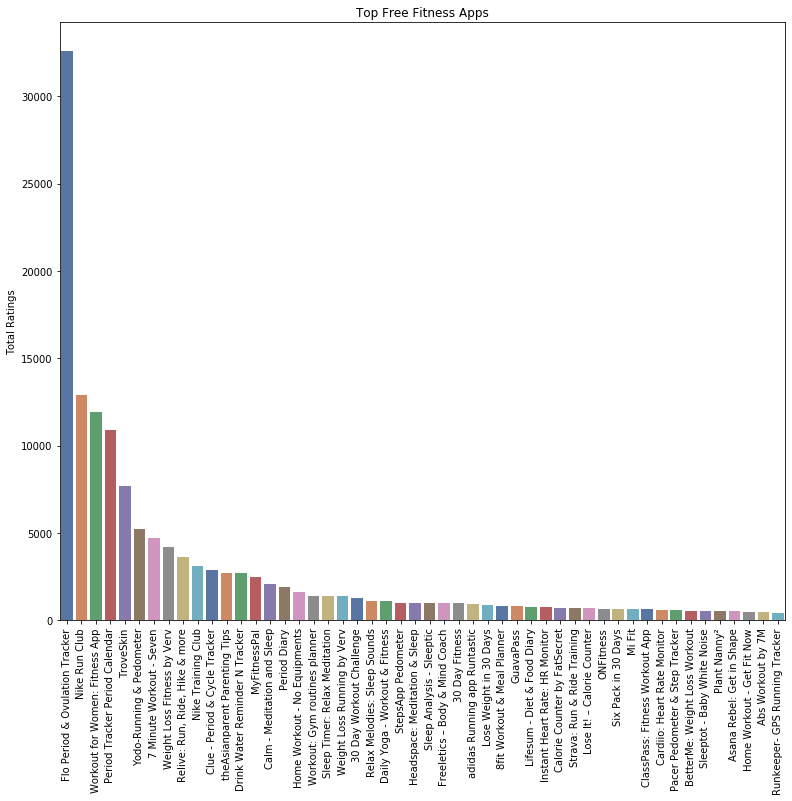

In [63]:
#top free fitness
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_fitness_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Free Fitness Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [64]:
#top paid shopping
top_paid_shopping_apps = df[(df["category"] ==        '                  Shopping                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_shopping_apps.head(10)


,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

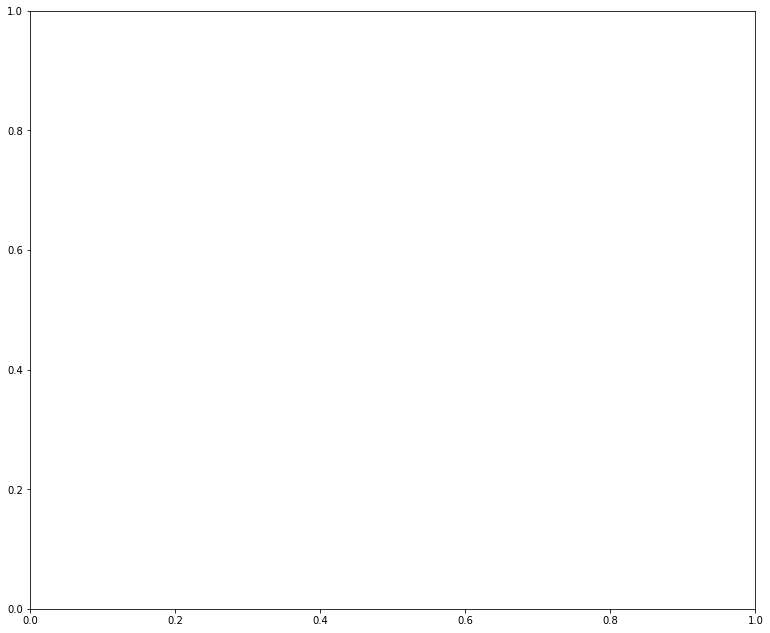

In [65]:
#top paid shopping
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_shopping_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Shopping Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [66]:
#top free shopping
top_free_shopping_apps = df[(df["category"] ==        '                  Shopping                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_shopping_apps.head(10)



,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4020,4,4.8,Shopping,Requires iOS 8.0 or later. Compatible with iPh...,"English, Bengali, Burmese, Indonesian, Malay, ...",Lazada - Best Shopping Online,0.0,3.0,209200.0,257.1,10,True,True
4021,1,4.7,Shopping,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian, Malay, Simplified Chinese...",Shopee: No.1 Belanja Online,0.0,1.0,202800.0,322.5,7,True,True
4024,4,4.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Italian, Japanese, Korean, Portuguese...",Tokopedia - #1 Everyday,0.0,2.0,196100.0,341.9,7,True,True
4018,4,3.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,English,Bukalapak - Jual Beli Online,0.0,7.0,109600.0,314.7,1,True,True
4019,4,4.9,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Chinese, Indonesian, Malay, Simplifie...",ZALORA - Fashion Shopping,0.0,6.0,79900.0,105.2,6,True,True
4017,1,4.6,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Croatian, Czech, Indonesian, ...",OLX Indonesia,0.0,4.0,69500.0,106.8,8,True,True
4014,4,4.5,Shopping,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Burmese, Cambodian, Chinese, ...",JD.ID - Jual Beli Online,0.0,10.0,49700.0,170.9,30,True,True
4015,1,4.8,Shopping,Requires iOS 11.0 or later. Compatible with iP...,"English, Indonesian",Blibli - Belanja Online,0.0,8.0,34700.0,284.1,2,True,True
4016,4,4.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Malay, Traditional Chinese",Carousell: Buy and Sell,0.0,12.0,31700.0,230.4,4,True,True
5435,4,4.8,Shopping,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Malay, Thai, Traditional ...",ShopBack - Cashback & Coupons,0.0,15.0,25900.0,163.1,6,True,True


Text(0.5, 0, '')

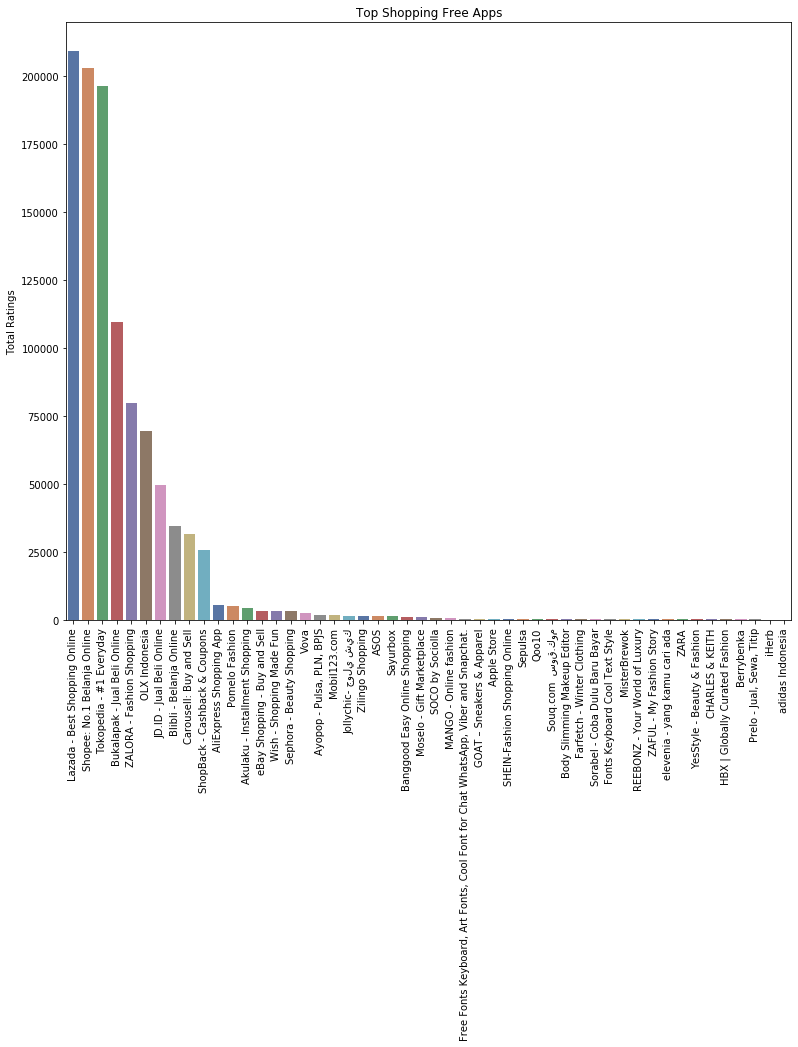

In [67]:
#top free shopping
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_shopping_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Shopping Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [68]:
#top paid medical
top_paid_medical_apps = df[(df["category"] ==        '                  Medical                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_medical_apps.head(10)



,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

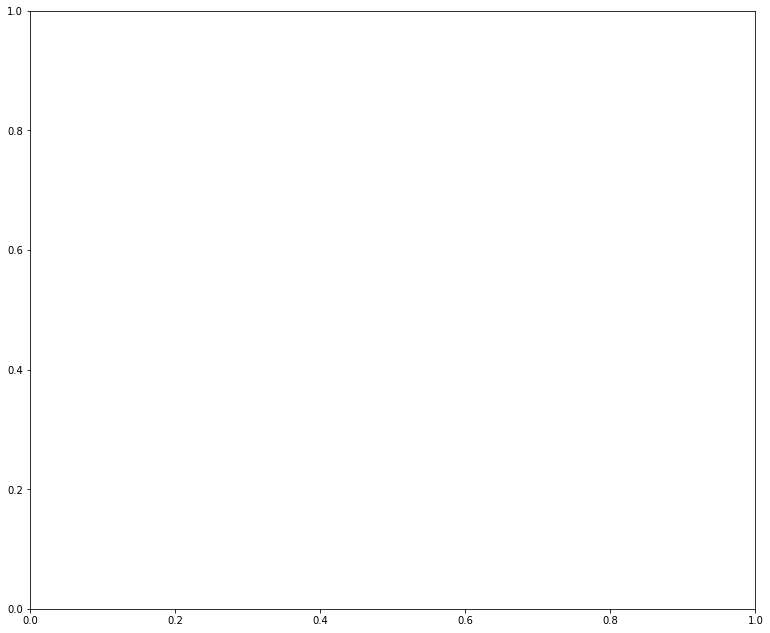

In [69]:
#top paid medical
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_medical_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Medical Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [70]:
#top free medical
top_free_medical_apps = df[(df["category"] ==        '                  Medical                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_medical_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
1864,4,4.9,Medical,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",Halodoc: Doctors & Medicines,0.0,1.0,30600.0,214.2,2,True,True
1862,1,4.8,Medical,Requires iOS 11.0 or later. Compatible with iP...,"English, Indonesian",Alodokter: Chat Bersama Dokter,0.0,3.0,4400.0,82.0,2,True,True
1861,1,4.9,Medical,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Czech, Danish, Dutch, Finnish...",Pregnancy +,0.0,4.0,4000.0,167.1,21,True,True
1866,1,2.6,Medical,Requires iOS 10.0 or later. Compatible with iP...,English,Mobile JKN,0.0,2.0,2100.0,69.6,1,True,True
1854,4,4.8,Medical,Requires iOS 9.0 or later. Compatible with iPh...,"English, Dutch, French, German, Hindi, Italian...",Contraction Timer & Counter 9m,0.0,10.0,957.0,26.8,15,True,True
1846,1,4.8,Medical,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",YesDok – Tanya Dokter 24 Jam,0.0,26.0,606.0,311.5,2,True,True
1798,4,4.9,Medical,Requires iOS 9.0 or later. Compatible with iPh...,English,MDCalc Medical Calculator,0.0,24.0,508.0,173.4,1,True,True
1828,1,4.9,Medical,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Italian, Portu...",Baby +,0.0,13.0,419.0,229.6,8,True,True
1843,1,4.9,Medical,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Portuguese, ...",Calculate by QxMD,0.0,64.0,352.0,74.3,6,True,True
1845,1,4.9,Medical,Requires iOS 9.3 or later. Compatible with iPh...,"English, French, German, Portuguese, Romanian,...",Ada – your health companion,0.0,49.0,321.0,19.5,6,True,True


Text(0.5, 0, '')

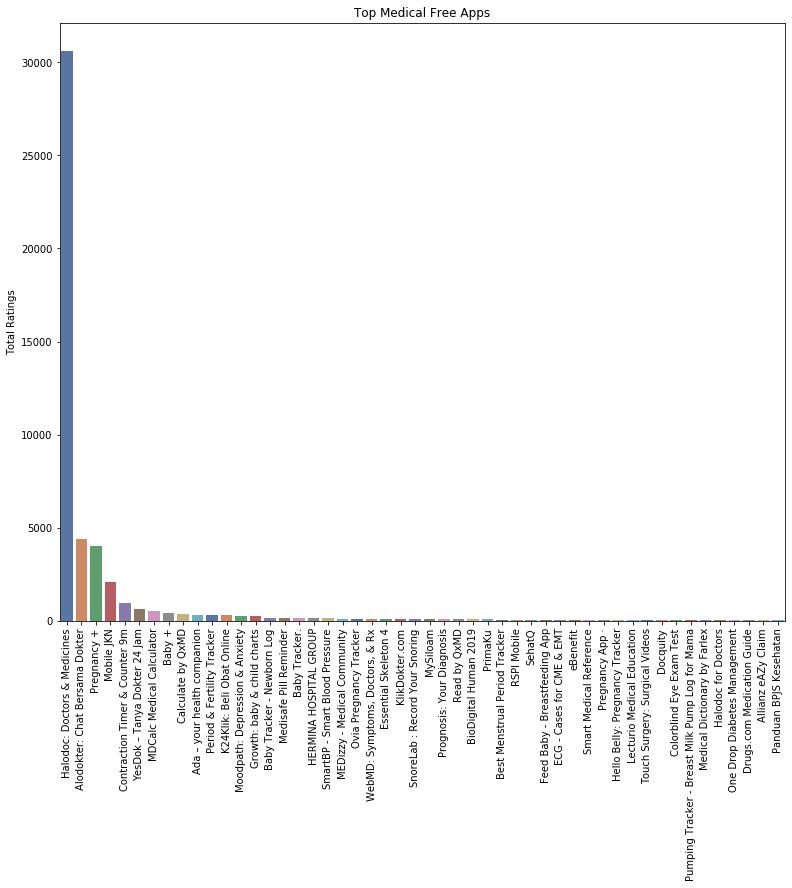

In [71]:
#top free medical
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_medical_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Medical Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [72]:
#top paid lifestyle
top_paid_lifestyle_apps =df[(df["category"] ==        '                  Lifestyle                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_lifestyle_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

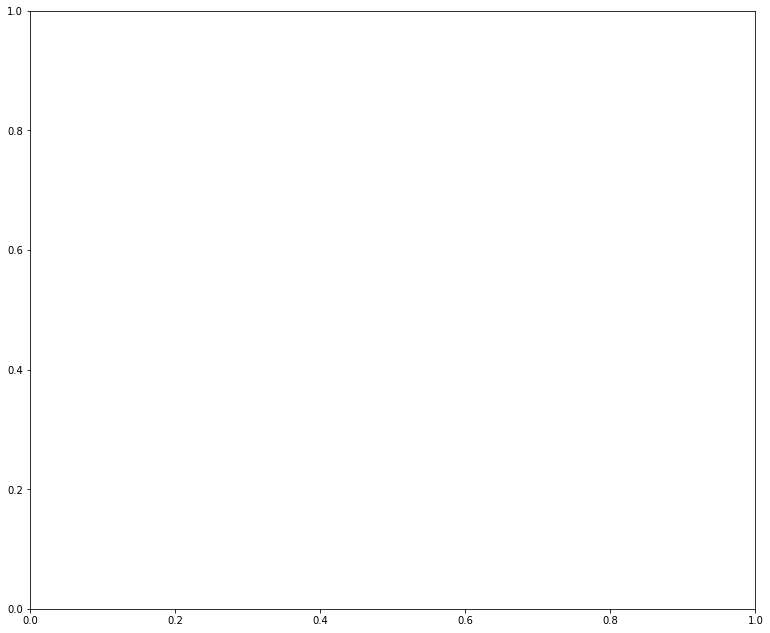

In [73]:
#top paid lifestyle
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_lifestyle_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Lifestyle Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [74]:
#top free lifestyle
top_free_lifestyle_apps =df[(df["category"] ==        '                  Lifestyle                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_lifestyle_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
2103,1,4.6,Lifestyle,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Arabic, Bengali, Bulgarian...",Tinder,0.0,2.0,26800.0,123.0,53,True,True
2101,4,4.6,Lifestyle,Requires iOS 9.0 or later. Compatible with iPh...,English,Mamikos - Cari Kost Mudah,0.0,8.0,8700.0,142.9,1,True,True
2093,4,4.6,Lifestyle,Requires iOS 10.0 or later. Compatible with iP...,"English, Danish, Dutch, French, German, Indone...",Live Wallpapers Now,0.0,28.0,8300.0,124.2,20,True,True
2026,4,4.9,Lifestyle,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Burmese, Cambodian, Chinese (...",Make Money - Earn Easy Cash,0.0,61.0,7200.0,26.8,30,True,True
1970,4,5.0,Lifestyle,Requires iOS 10.3 or later. Compatible with iP...,English,Rapid VPN Proxy,0.0,NaN,5900.0,95.6,1,False,True
2080,1,4.4,Lifestyle,Requires iOS 7.0 or later. Compatible with iPh...,"English, Arabic, Catalan, Croatian, Czech, Dan...","Anonymous Chat Rooms, Dating",0.0,45.0,5000.0,79.4,33,True,True
2099,4,4.9,Lifestyle,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Indonesian, Italian, ...",Perfect365,0.0,78.0,4300.0,230.5,12,True,True
2064,4,4.8,Lifestyle,Requires iOS 8.0 or later. Compatible with iPh...,English,Waktu Sholat Indonesia,0.0,170.0,3600.0,79.0,1,True,True
1977,1,4.9,Lifestyle,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Burmese, Cambodian, Chinese, ...",Money App – Cash & Rewards App,0.0,88.0,3500.0,29.8,30,True,True
2104,4,3.6,Lifestyle,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",GoLife | Simplify Your Life,0.0,1.0,3300.0,139.1,2,True,True


Text(0.5, 0, '')

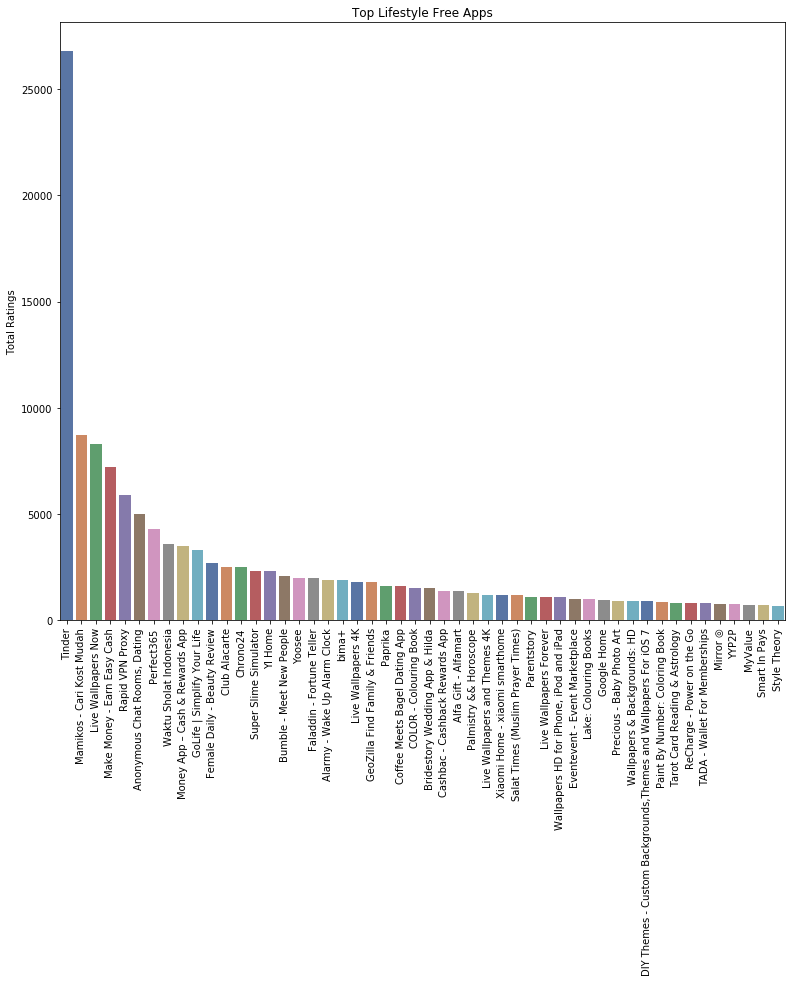

In [75]:
#top free lifestyle
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_lifestyle_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Lifestyle Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [76]:
#top paid travel
top_paid_travel_apps =df[(df["category"] ==        '                  Travel                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_travel_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

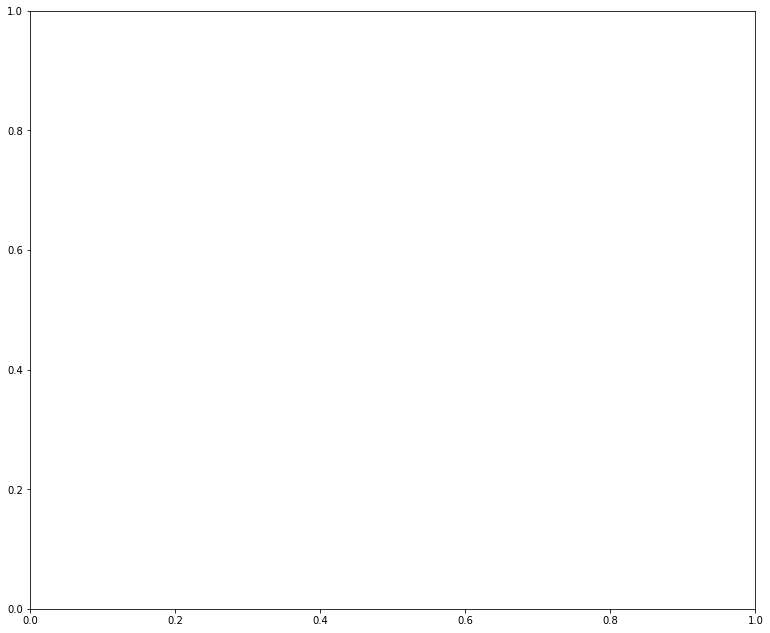

In [77]:
#top free travel
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_travel_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Travel Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [78]:
#top free travel
top_free_travel_apps =df[(df["category"] ==        '                  Travel                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_travel_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4504,4,4.6,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Burmese, Cambodian, Indonesian, Malay...",Grab App,0.0,1.0,135800.0,575.2,8,True,True
4505,4,4.0,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Thai, Vietnamese",Gojek,0.0,2.0,70600.0,361.4,4,True,True
4496,4,4.9,Travel,Requires iOS 10.3 or later. Compatible with iP...,"English, Indonesian",Pegipegi Hotel Train Flight,0.0,10.0,46000.0,117.6,2,True,True
4493,4,4.8,Travel,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Catalan, Croatian,...",Booking.com Travel Deals,0.0,13.0,29900.0,193.8,40,True,True
4498,4,4.8,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Catalan, Croatian,...",Agoda - Best Travel Deals,0.0,8.0,29600.0,336.1,37,True,True
4494,4,4.8,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Japanese, Korean, Malay, ...",AirAsia,0.0,11.0,25200.0,200.3,9,True,True
4480,4,4.9,Travel,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Bulgarian, Burmese, Cambodian...",Skyscanner – travel deals,0.0,29.0,23500.0,191.5,42,True,True
4487,4,4.9,Travel,Requires iOS 10.0 and watchOS 3.2 or later. Co...,"English, French, German, Japanese, Portuguese,...",Flightradar24 | Flight Tracker,0.0,15.0,20500.0,209.5,7,True,True
4501,4,4.6,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian, Malay, Thai, Vietnamese","Traveloka: Flight, Hotel, Trip",0.0,3.0,16000.0,325.0,5,True,True
4483,4,4.8,Travel,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Hindi, Indonesian, Japanese, ...",OYO: Search & Book Hotel Rooms,0.0,9.0,14300.0,144.5,9,True,True


Text(0.5, 0, '')

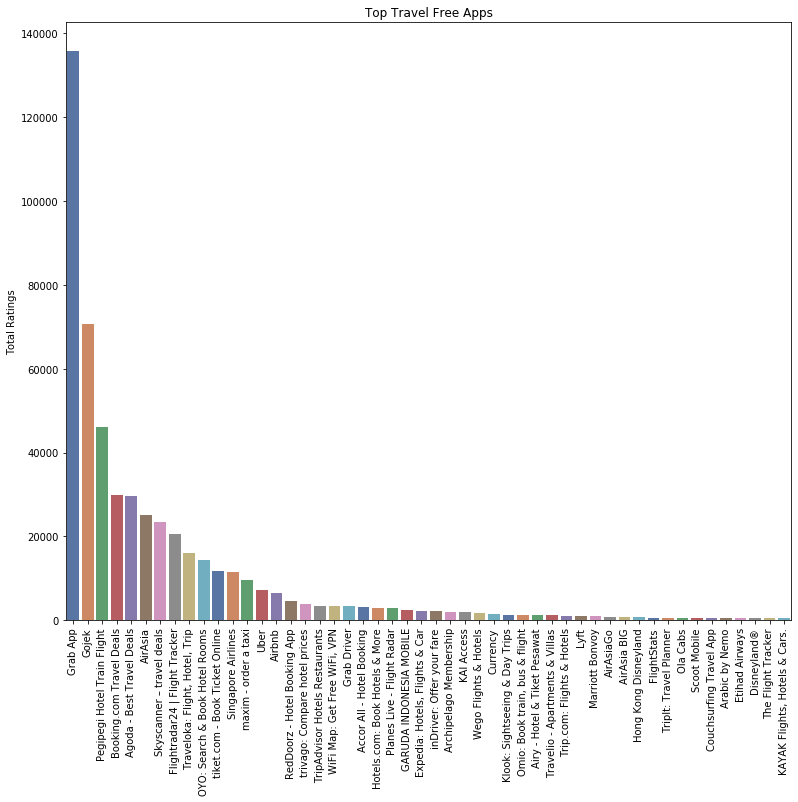

In [79]:
#top free travel
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_travel_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Travel Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [80]:
#top paid finance
top_paid_finance_apps =df[(df["category"] ==        '                  Finance                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_finance_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

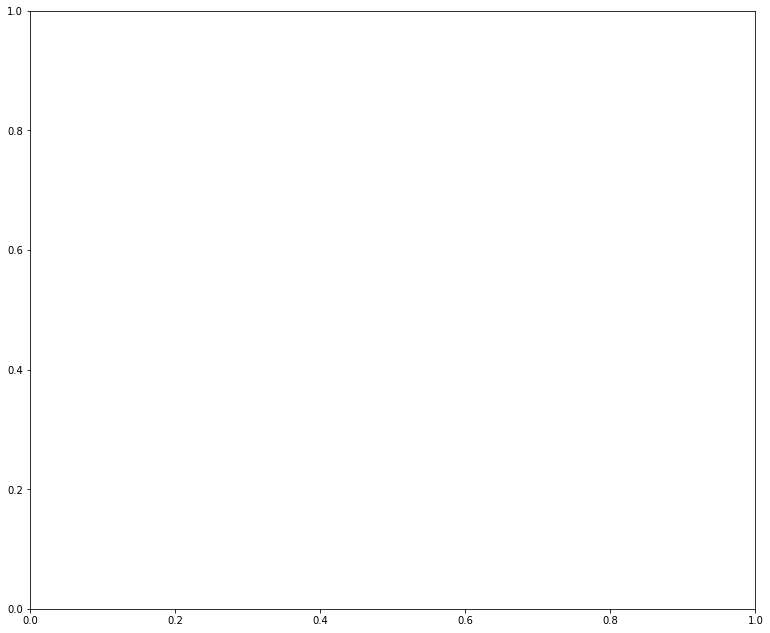

In [81]:
#top paid finance
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_finance_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Finance Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [82]:
#top free finance
top_free_finance_apps =df[(df["category"] ==        '                  Finance                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_finance_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3047,4,4.8,Finance,Requires iOS 10 or later. Compatible with iPho...,"English, Indonesian",Kredivo,0.0,6.0,52100.0,89.2,2,True,True
3053,4,4.8,Finance,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",DANA,0.0,3.0,35500.0,114.5,2,True,True
3044,4,4.9,Finance,Requires iOS 9.0 or later. Compatible with iPh...,English,Go Mobile by CIMB Niaga,0.0,34.0,26600.0,131.3,1,True,True
3050,4,3.4,Finance,Requires iOS 9.0 or later. Compatible with iPh...,English,LinkAja,0.0,5.0,10700.0,210.2,1,True,True
3052,4,3.8,Finance,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",OVO,0.0,1.0,9700.0,157.1,2,True,True
3079,4,3.3,Finance,Requires iOS 7.0 or later. Compatible with iPh...,English,BCA mobile,0.0,2.0,8400.0,177.3,1,True,True
3032,4,4.7,Finance,Requires iOS 10.0 or later. Compatible with iP...,English,TUNAIKU: Pinjaman Uang Online,0.0,16.0,7500.0,114.4,1,True,True
3039,4,4.4,Finance,Requires iOS 11.0 or later. Compatible with iP...,"English, Chinese, Hindi, Indonesian, Kazakh, K...",Binomo: Make Money Investing,0.0,23.0,6400.0,73.6,14,True,True
3051,4,2.1,Finance,Requires iOS 8.0 or later. Compatible with iPh...,"English, Indonesian",mandiri online,0.0,9.0,6400.0,31.8,2,True,True
2994,4,4.6,Finance,Requires iOS 10.0 or later. Compatible with iP...,English,Uangku,0.0,72.0,5300.0,79.1,1,True,True


Text(0.5, 0, '')

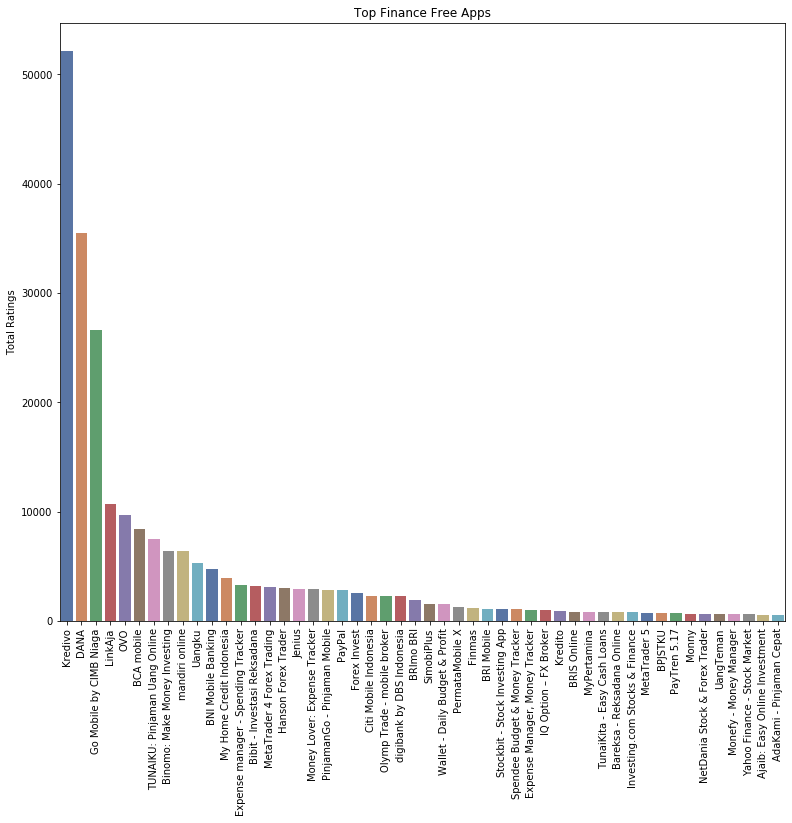

In [83]:
#top free finance
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_finance_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Finance Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [84]:
df.category.unique()

array(['                  Books                ',
       '                  Business                ',
       '                  Finance                ',
       '                  Entertainment                ',
       '                  Education                ',
       '                  Games                ',
       '                  Food & Drink                ',
       '                  Lifestyle                ',
       '                  Medical                ',
       '                  Health & Fitness                ',
       '                  Music                ',
       '                  News                ',
       '                  Photo & Video                ',
       '                  Productivity                ',
       '                  Reference                ',
       '                  Navigation                ',
       '                  Sports                ',
       '                  Magazines & Newspapers                ',
       '          

In [85]:
#top paid Entertainment
top_paid_entertainment_apps =df[(df["category"] ==        '                  Entertainment                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_entertainment_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

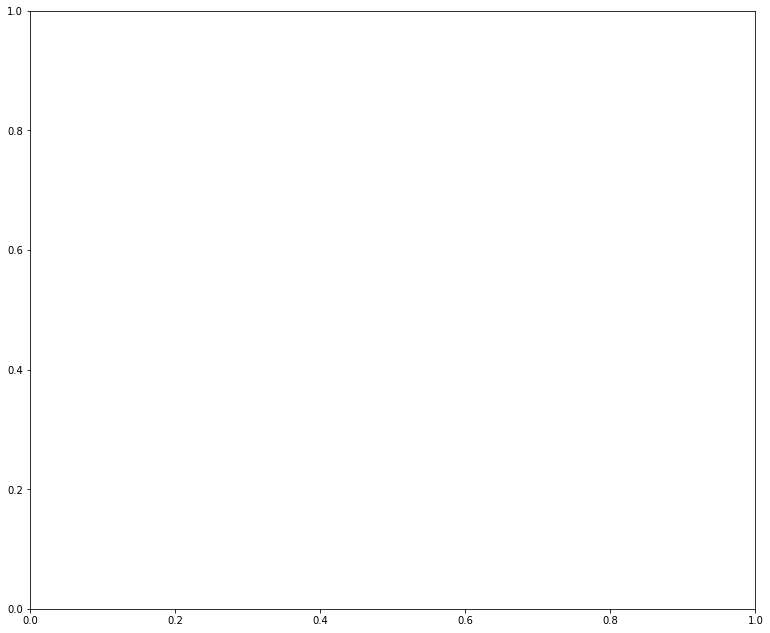

In [86]:
#top paid Entertainment
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_entertainment_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Entertainment Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [87]:
#top free Entertainment
top_free_entertainmet_apps =df[(df["category"] ==        '                  Entertainment                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_entertainmet_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3289,1,4.8,Entertainment,Requires iOS 9.3 or later. Compatible with iPh...,"English, Arabic, Bengali, Burmese, Cambodian, ...",TikTok-Global Video Community,0.0,1.0,71300.0,384.6,40,True,True
3283,1,4.8,Entertainment,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",TIX ID,0.0,4.0,46300.0,146.5,2,True,True
3270,1,4.7,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, French, German, Italian, Mala...",Top Sticker Maker Studio Memes,0.0,14.0,21000.0,72.1,10,True,True
3266,4,4.8,Entertainment,Requires iOS 9.0 or later. Compatible with iPh...,"English, Afrikaans, Albanian, Amharic, Arabic,...",YouTube Kids,0.0,12.0,20900.0,226.3,73,True,True
3281,1,4.8,Entertainment,Requires iOS 10.0 or later. Compatible with iP...,"English, Indonesian",Vidio - Nonton TV & Video,0.0,11.0,11500.0,150.3,2,True,True
3285,1,4.5,Entertainment,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Bengali, Burmese, Cambodian, ...","iflix: Movies, TV Series, News",0.0,3.0,10100.0,113.5,12,True,True
3264,1,4.7,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, Portuguese, Spanish",Sticker Maker + Stickers,0.0,13.0,9000.0,142.7,3,True,True
3284,1,2.6,Entertainment,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Indonesian, Malay",Viu -Stream TV Shows & Serials,0.0,5.0,9000.0,145.6,4,True,True
3227,4,4.7,Entertainment,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Indonesian, Italian, ...",UNICORN: Pixel Art by Numbers,0.0,143.0,8600.0,179.5,15,True,True
3214,4,4.2,Entertainment,Requires iOS 9.0 or later. Compatible with iPh...,English,Fake GPS Location -for iPhone,0.0,39.0,7700.0,138.4,1,True,True


Text(0.5, 0, '')

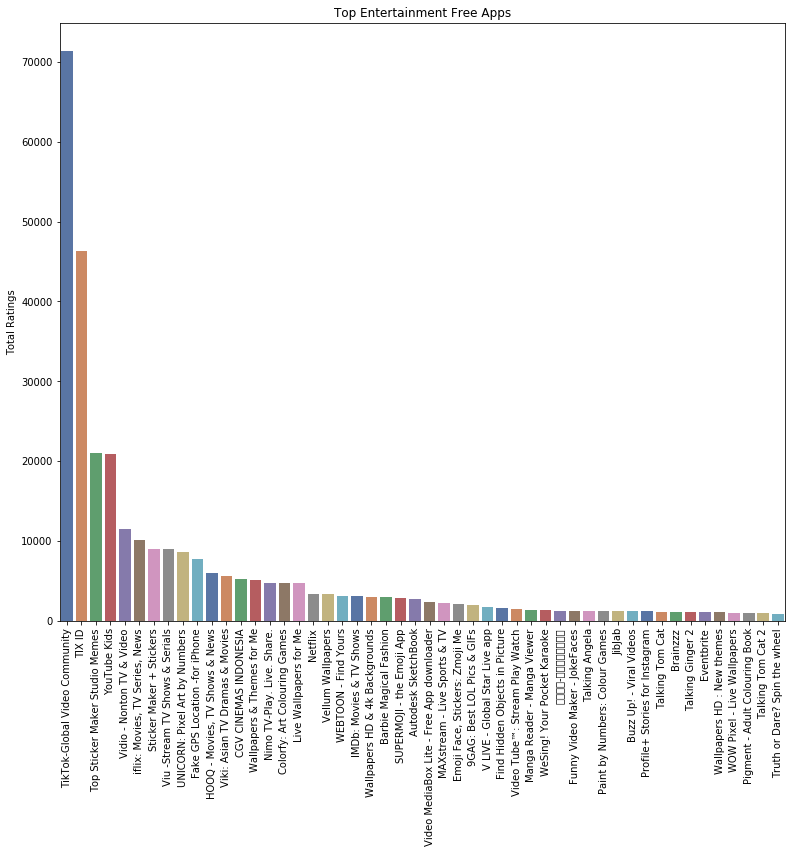

In [89]:
#top free Entertainment
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_entertainmet_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Entertainment Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [90]:
#top paid Business
top_paid_business_apps =df[(df["category"] ==        '                  Business                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_business_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3584,4,4.9,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Hindi, Italian...",iScanner - PDF Scanner App,219000.0,8.0,1100.0,116.2,14,True,False
3578,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Po...",Scanner Pro: PDF Scanner App,59000.0,4.0,697.0,159.5,9,True,False
3711,4,3.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",Docs To Go Premium,249000.0,9.0,7.0,88.2,6,True,False


Text(0.5, 0, '')

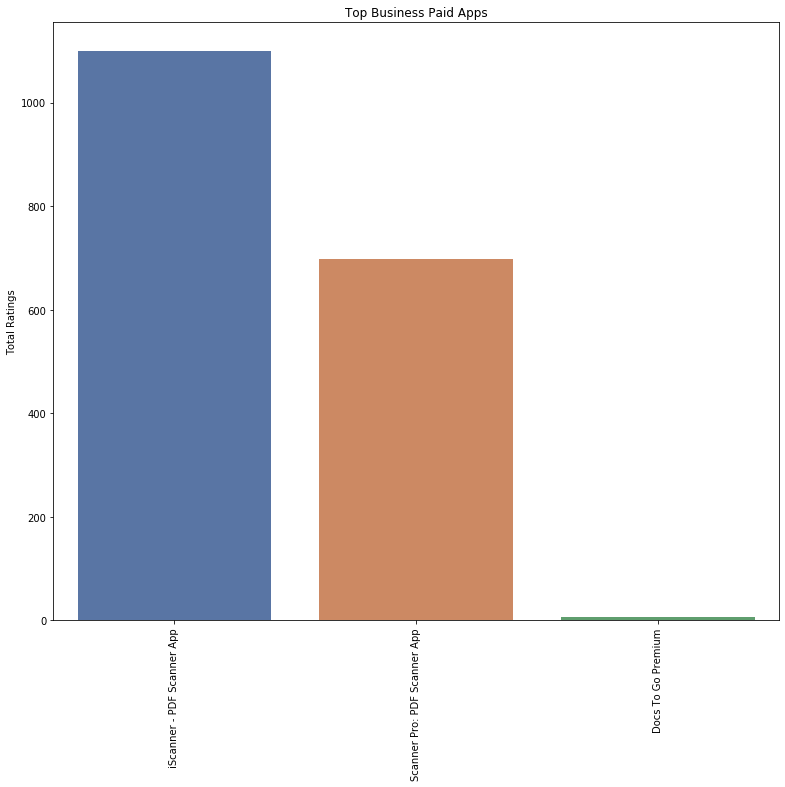

In [91]:
#top paid Business
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_business_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Business Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [92]:
#top free Business
top_free_business_apps =df[(df["category"] ==        '                  Business                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_business_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3761,1,4.8,Business,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Catalan, Croatian, C...",WhatsApp Business,0.0,1.0,22800.0,153.3,39,True,True
3759,4,4.8,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Scanner for Me: Scan documents,0.0,14.0,17500.0,265.4,14,True,True
3763,4,4.8,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, Dutch, French, German, Hindi, Italian...",Scanner App: PDF Document Scan,0.0,3.0,14800.0,144.1,14,True,True
3755,1,4.8,Business,Requires iOS 10.0 and watchOS 2.0 or later. Co...,"English, Arabic, Danish, Dutch, French, German...",Alibaba.com B2B Trade App,0.0,10.0,10900.0,240.1,20,True,True
3768,4,4.8,Business,Requires iOS 12.0 or later. Compatible with iP...,"English, Czech, Danish, Dutch, Finnish, French...",Adobe Acrobat Reader for PDF,0.0,8.0,5800.0,227.7,19,True,True
3751,4,4.7,Business,Requires iOS 10.0 or later. Compatible with iP...,"English, Afrikaans, Arabic, Bengali, Burmese, ...",Scanner PDF – scan document,0.0,12.0,5200.0,79.5,45,True,True
3727,4,4.9,Business,Requires iOS 12.0 or later. Compatible with iP...,"English, Czech, Danish, Dutch, Finnish, French...",Adobe Scan: PDF & Card Scanner,0.0,31.0,4900.0,131.7,19,True,True
3743,4,4.8,Business,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Magic Eraser Background Editor,0.0,11.0,4100.0,27.1,16,True,True
3750,4,4.9,Business,Requires iOS 10.0 or later. Compatible with iP...,English,jobsDB Job Search,0.0,22.0,3500.0,41.7,1,True,True
3764,4,2.1,Business,Requires iOS 10.0 or later. Compatible with iP...,English,myIndiHome,0.0,4.0,3400.0,64.1,1,True,True


Text(0.5, 0, '')

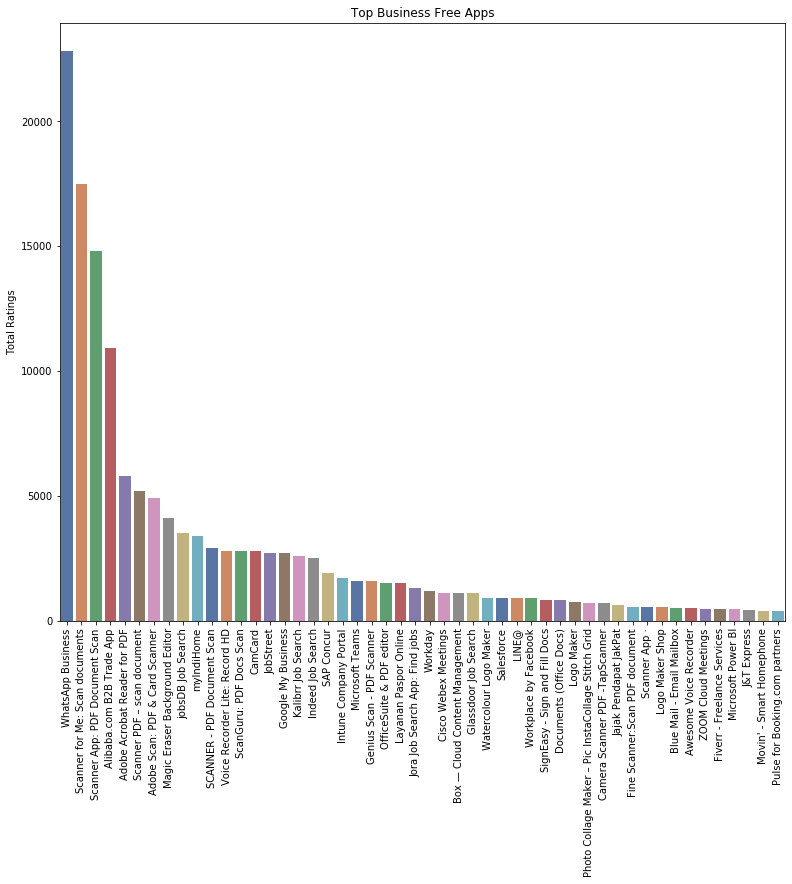

In [93]:
#top free Business
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_business_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Business Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [94]:
#top paid Education
top_paid_education_apps =df[(df["category"] ==        '                  Education                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_education_apps.head(10)






,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

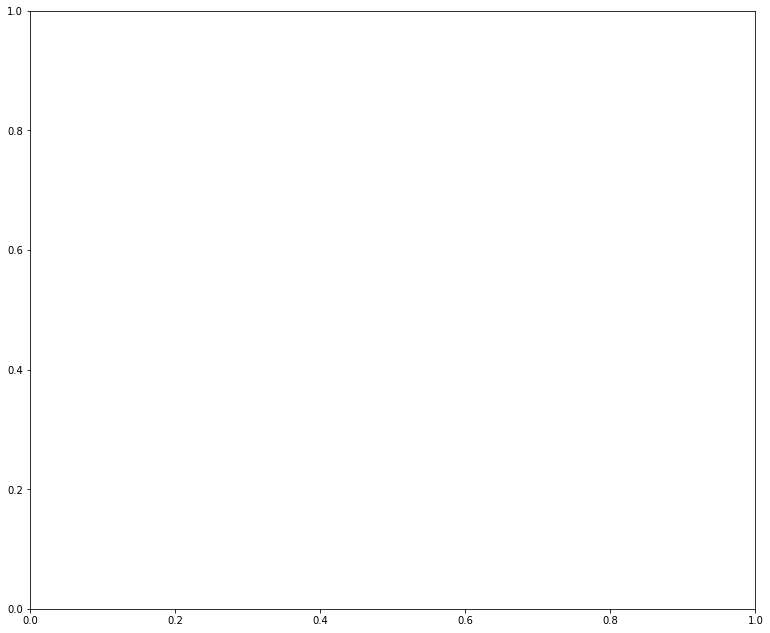

In [95]:
#top paid Education
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_education_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Education Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [96]:
#top free Education
top_free_education_apps =df[(df["category"] ==        '                  Education                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_education_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
3523,4,4.8,Education,Requires iOS 9.0 or later. Compatible with iPh...,English,Ruangguru – App Belajar No.1,0.0,1.0,20100.0,174.0,1,True,True
3520,4,4.8,Education,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Czech, Dutch, French, German,...",Duolingo - Language Lessons,0.0,5.0,7400.0,104.0,24,True,True
3531,4,4.8,Education,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Math Learner: Cool Maths Games,0.0,NaN,5100.0,197.4,12,False,True
3507,4,4.8,Education,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, Japanese, Simplified Chinese,...",LearnEnglish Grammar (UK ed.),0.0,45.0,4100.0,115.1,6,True,True
3511,4,4.8,Education,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Simply Piano by JoyTunes,0.0,12.0,3900.0,431.5,11,True,True
3502,4,4.7,Education,Requires iOS 8.0 or later. Compatible with iPh...,English,Daily Prayers for Muslim,0.0,89.0,3300.0,68.7,1,True,True
3528,4,4.8,Education,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Croatian, Czech, Danish, Dutc...",Photomath,0.0,6.0,3200.0,101.4,32,True,True
3521,4,4.7,Education,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Czech, Dutch, Filipino, Finni...",Bright - English for beginners,0.0,11.0,2900.0,182.8,26,True,True
3505,4,4.8,Education,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Danish, Dutch, French, German...",Learn Languages with Memrise,0.0,49.0,2500.0,332.0,22,True,True
3537,4,4.8,Education,Requires iOS 11.0 and watchOS 2.0 or later. Co...,"English, Danish, Dutch, French, German, Italia...",Peak - Brain Training,0.0,33.0,2400.0,530.9,14,True,True


Text(0.5, 0, '')

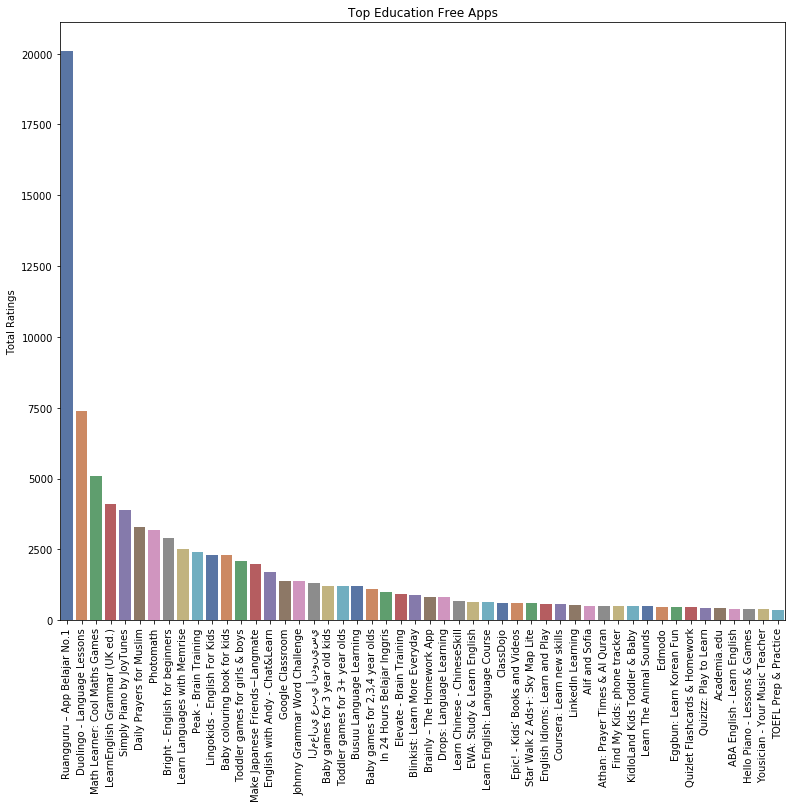

In [97]:
#top free Education
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_education_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Education Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [98]:
#top paid Food & Drink
top_paid_food_apps =df[(df["category"] ==        '                  Food & Drink                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_food_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
2642,4,4.4,Food & Drink,Requires iOS 10.3 or later. Compatible with iP...,English,Annabel Karmel,59000.0,2.0,36.0,120.9,1,True,False


Text(0.5, 0, '')

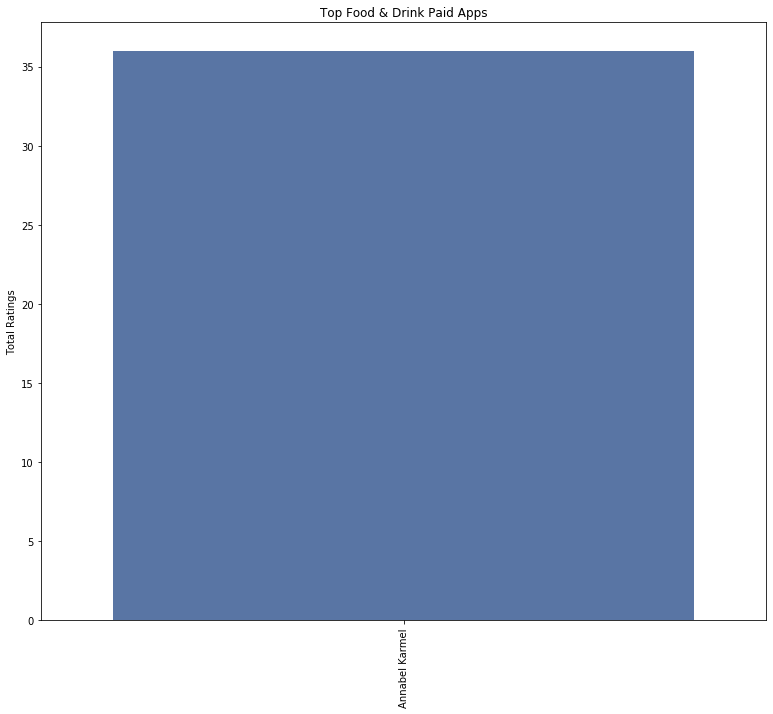

In [99]:
#top paid Food & Drink
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_food_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Food & Drink Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [100]:
#top free Food & Drink
top_free_food_apps =df[(df["category"] ==        '                  Food & Drink                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_food_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
2807,1,4.9,Food & Drink,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Fave - Deals & Cashback,0.0,10.0,19700.0,113.7,2,True,True
2817,4,4.8,Food & Drink,Requires iOS 10.0 or later. Compatible with iP...,"English, Czech, Hindi, Indonesian, Italian, Po...",Zomato - Food & Restaurants,0.0,5.0,11800.0,161.8,10,True,True
2816,4,4.9,Food & Drink,Requires iOS 11.4 or later. Compatible with iP...,"English, Arabic, Bengali, Danish, French, Germ...",Cookpad - Recipe Sharing,0.0,4.0,11600.0,57.6,24,True,True
2794,1,4.9,Food & Drink,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian, Simplified Chinese, Thai,...","Chope - Discover, Book, Save",0.0,33.0,4200.0,157.9,5,True,True
2815,4,4.4,Food & Drink,Requires iOS 9.3 and watchOS 4.0 or later. Com...,"English, Indonesian",Pizza Hut Delivery Indonesia,0.0,8.0,1900.0,146.5,2,True,True
2806,4,4.6,Food & Drink,Requires iOS 9.0 or later. Compatible with iPh...,English,Fore Coffee,0.0,3.0,1800.0,80.2,1,True,True
2800,1,4.9,Food & Drink,Requires iOS 11.0 or later. Compatible with iP...,"English, Indonesian, Korean, Thai, Traditional...",eatigo,0.0,27.0,1600.0,84.0,5,True,True
2797,4,4.9,Food & Drink,Requires iOS 12.0 or later. Compatible with iP...,English,Tasty,0.0,26.0,1400.0,67.8,1,True,True
2780,1,4.8,Food & Drink,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Burmese, Cambodian, Chinese, ...",honestbee food & groceries,0.0,153.0,843.0,230.5,30,True,True
2811,4,2.2,Food & Drink,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Starbucks Indonesia,0.0,6.0,828.0,43.6,2,True,True


Text(0.5, 0, '')

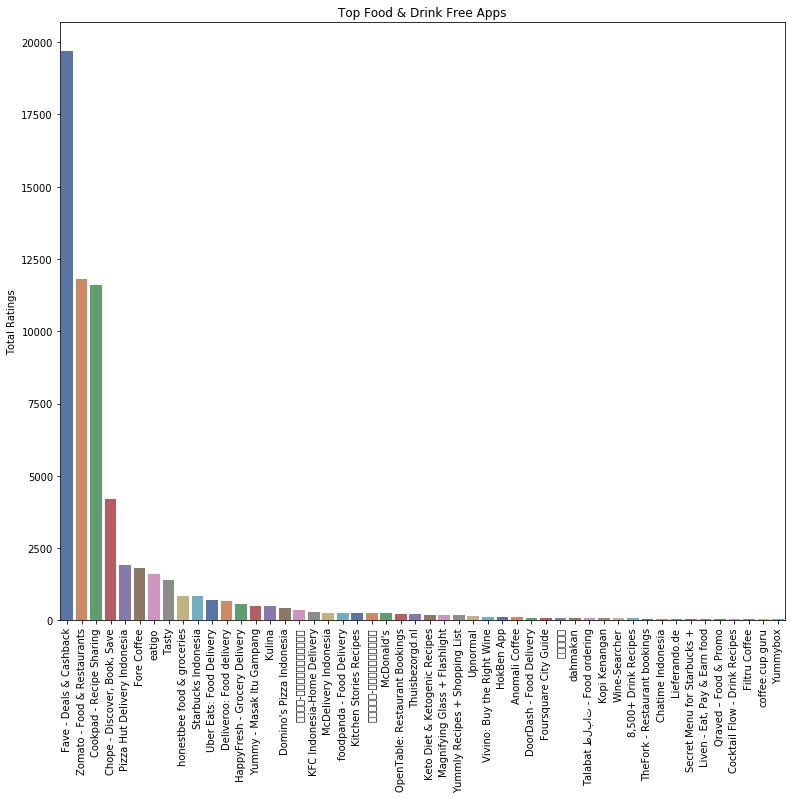

In [102]:
#top free Food & Drink
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_food_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Food & Drink Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [103]:
#top paid Magazines & Newspapers
top_paid_magazines_apps =df[(df["category"] ==        '                  Magazines & Newspapers                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_magazines_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

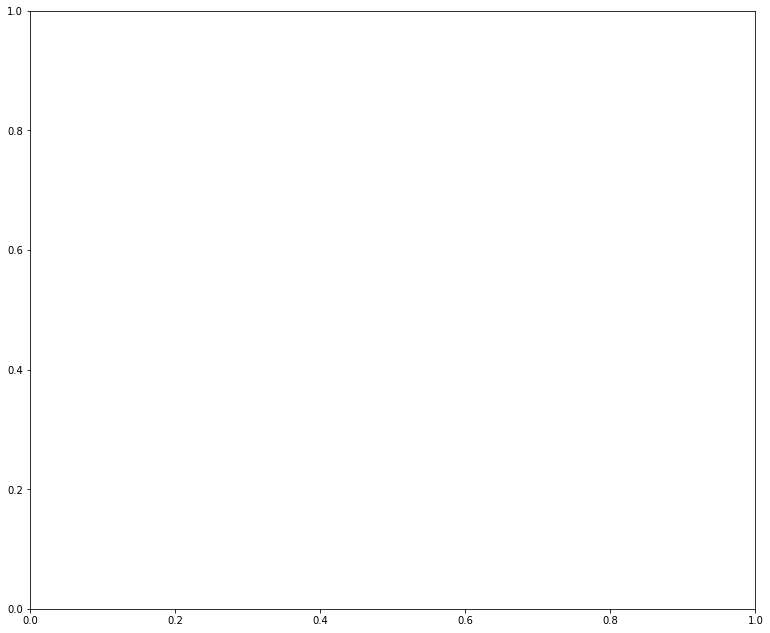

In [104]:
#top paid Magazines & Newspapers
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_magazines_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Magazines & Newspapers Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [105]:
#top free Magazines & Newspapers
top_free_magazines_apps =df[(df["category"] ==        '                  Magazines & Newspapers                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_magazines_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
1626,1,3.6,Magazines & Newspapers ...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Indonesian",Gramedia Digital,0.0,2.0,865.0,45.8,2,True,True
1617,1,4.7,Magazines & Newspapers ...,Requires iOS 10.3 or later. Compatible with iP...,"English, Catalan, Danish, Dutch, Finnish, Fren...",ZINIO - Magazine Newsstand,0.0,11.0,95.0,143.0,17,True,True
1620,1,4.2,Magazines & Newspapers ...,Requires iOS 9.1 or later. Compatible with iPh...,"English, Danish, French, German, Hungarian, It...",Lifestyle For Men Magazine,0.0,3.0,16.0,79.9,11,True,True
1557,1,4.7,Magazines & Newspapers ...,Requires iOS 9.0 or later. Compatible with iPh...,"English, Afrikaans, Arabic, Danish, Dutch, Fre...",POPULAR Magazine Indonesia,0.0,16.0,7.0,24.8,15,True,True
1514,1,4.3,Magazines & Newspapers ...,Requires iOS 11.0 and watchOS 6.0 or later. Co...,English,Curio: hear great journalism,0.0,8.0,4.0,66.7,1,True,True
1430,1,4.8,Magazines & Newspapers ...,Requires iOS 9.0 or later. Compatible with iPh...,English,Q: The Biggest Music Magazine,0.0,NaN,4.0,66.8,1,False,True
1625,1,1.0,Magazines & Newspapers ...,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Catalan, Czech, Dutch, French...",Nat Geo Magazine International,0.0,18.0,3.0,40.7,16,True,True
1524,1,4.0,Magazines & Newspapers ...,Requires iOS 9.0 or later. Compatible with iPh...,English,Cosmopolitan Indonesia Mag,0.0,153.0,3.0,25.2,1,True,True
1579,1,4.5,Magazines & Newspapers ...,Requires iOS 9.0 or later. Compatible with iPh...,English,FHM India,0.0,69.0,2.0,24.8,1,True,True
1463,1,5.0,Magazines & Newspapers ...,Requires iOS 9.0 or later. Compatible with iPh...,English,Empire – The #1 Movie Magazine,0.0,NaN,2.0,57.6,1,False,True


Text(0.5, 0, '')

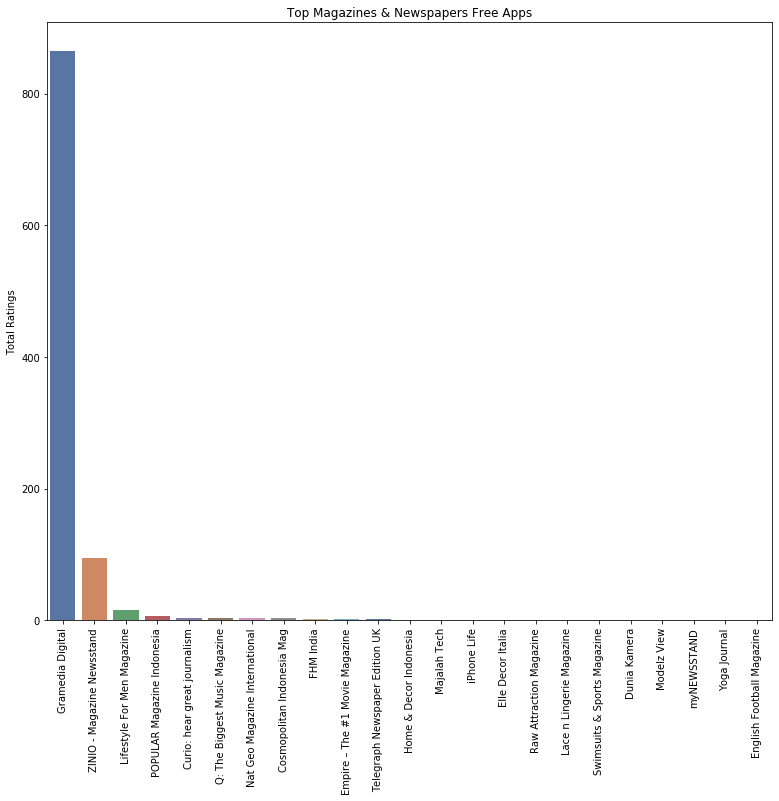

In [106]:
#top free Magazines & Newspapers
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_magazines_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Magazines & Newspapers Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [107]:
#top paid Music
top_paid_music_apps =df[(df["category"] ==        '                  Music                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_music_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

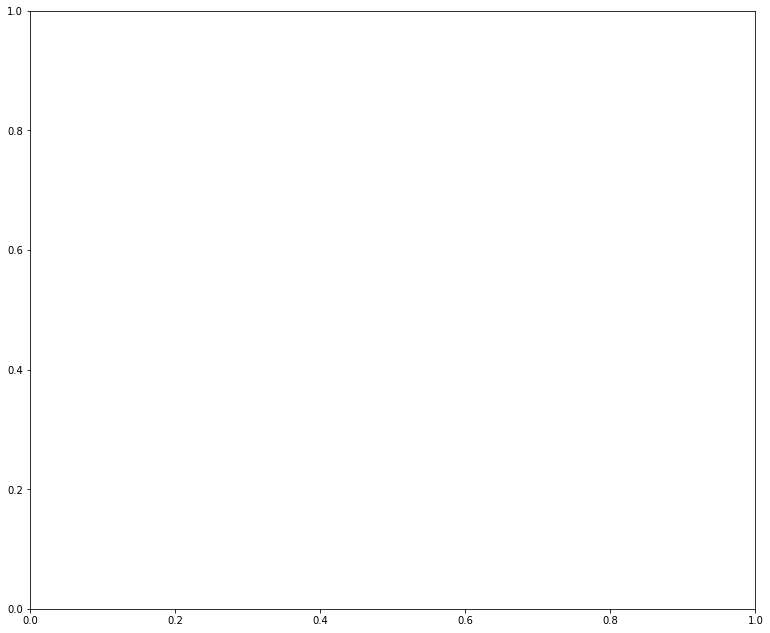

In [108]:
#top paid Music
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_music_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Music Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [109]:
#top free Music
top_free_music_apps =df[(df["category"] ==        '                  Music                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_music_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
1407,4,4.8,Music,Requires iOS 9.0 or later. Compatible with iPh...,"English, Burmese, Indonesian, Malay, Simplifie...",JOOX Music,0.0,2.0,821600.0,239.3,7,True,True
1406,1,4.8,Music,Requires iOS 11.0 and watchOS 4.0 or later. Co...,"English, Arabic, Czech, Dutch, Finnish, French...",Spotify New Music and Podcasts,0.0,1.0,546300.0,110.0,23,True,True
1402,1,4.9,Music,Requires iOS 11.0 and watchOS 5.0 or later. Co...,"English, Czech, Dutch, French, German, Italian...",Shazam,0.0,7.0,75700.0,57.6,16,True,True
1399,4,4.7,Music,Requires iOS 9.3 or later. Compatible with iPh...,"English, Danish, Dutch, French, German, Hindi,...",REAL DRUM: Electronic Drum Set,0.0,12.0,16800.0,97.0,19,True,True
1381,1,4.8,Music,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Indonesian, Italian, ...",Young Radio+ Music,0.0,8.0,16200.0,72.8,12,True,True
1404,1,4.7,Music,Requires iOS 9.0 or later. Compatible with iPh...,"English, Afrikaans, Arabic, Bengali, Burmese, ...",Smule - The Social Singing App,0.0,10.0,11600.0,161.4,49,True,True
1389,1,4.8,Music,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Arabic, Danish, Dutch, French, German...",myTuner Radio - Live FM Player,0.0,29.0,6700.0,177.9,21,True,True
1396,9,4.9,Music,Requires iOS 12.0 and watchOS 5.0 or later. Co...,"English, Czech, Danish, Dutch, Finnish, French...",SoundHound - Music Discovery,0.0,21.0,5800.0,76.8,23,True,True
1387,1,4.5,Music,Requires iOS 9.0 and watchOS 2.0 or later. Com...,English,Unlimited Music Player Now,0.0,42.0,5100.0,79.6,1,True,True
1340,1,4.7,Music,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Indonesian, Japanese,...",Yolk Radio Music Mate,0.0,19.0,4900.0,67.1,10,True,True


Text(0.5, 0, '')

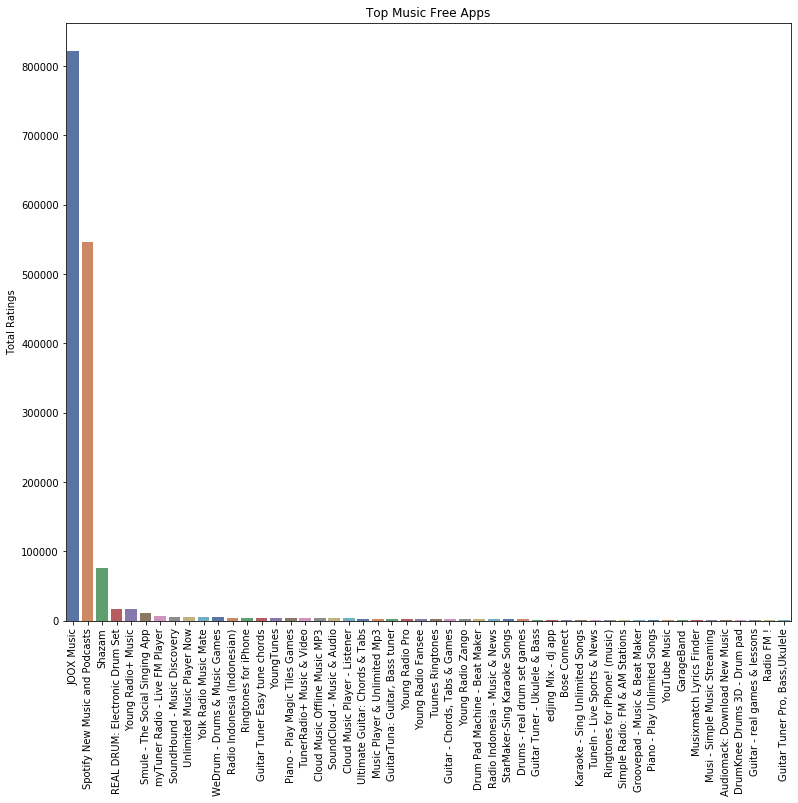

In [110]:
#top free Music
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_music_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Music Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [111]:
#top paid Navigation
top_paid_navigation_apps =df[(df["category"] ==        '                  Navigation                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_navigation_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
783,4,4.7,Navigation,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Dutch, Finnish, French, German, Itali...",Speed Tracker. Pro,89000.0,6.0,12.0,58.1,11,True,False
845,4,4.8,Navigation,Requires iOS 11.0 and watchOS 3.0 or later. Co...,English,MotionX GPS,29000.0,5.0,5.0,64.3,1,True,False


Text(0.5, 0, '')

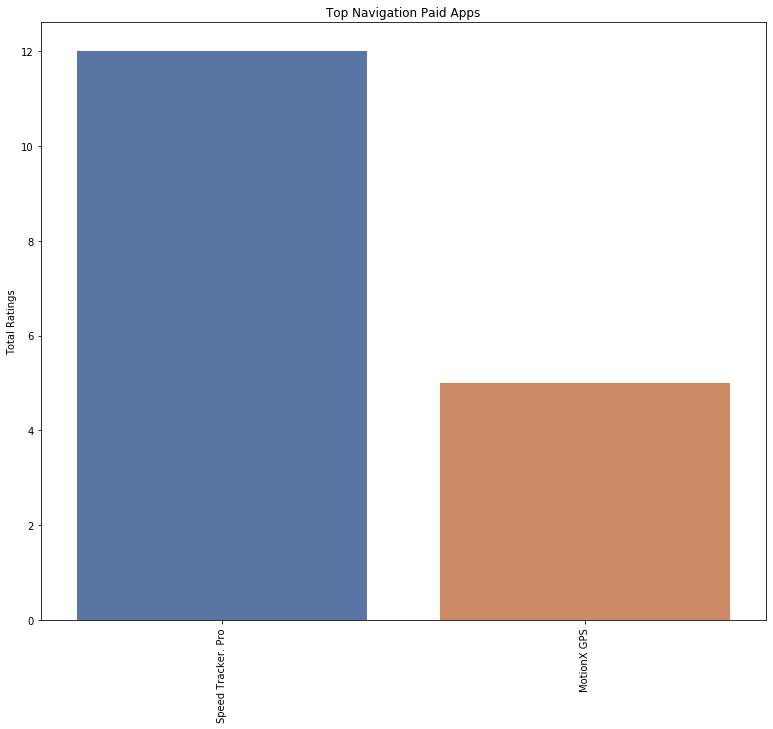

In [112]:
#top paid Navigation
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_navigation_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Navigation Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [113]:
#top free Navigation
top_free_navigation_apps =df[(df["category"] ==        '                  Navigation                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_navigation_apps.head(10)






,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
968,4,4.8,Navigation,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Catalan, Chinese (Hong Kong),...",Google Maps - Transit & Food,0.0,1.0,254500.0,247.6,34,True,True
961,4,4.8,Navigation,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Azerbaijani, Bosnian, Danish,...","Qibla Finder, Qibla Compass AR",0.0,8.0,9700.0,84.9,25,True,True
966,4,3.7,Navigation,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Arabic, Bulgarian, Catalan...",Waze Navigation & Live Traffic,0.0,2.0,2500.0,131.1,41,True,True
904,4,4.7,Navigation,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",GPS.id by Super Spring,0.0,46.0,2000.0,105.4,2,True,True
942,4,4.8,Navigation,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, French, German, Italian, Japa...",Qibla Compass (Kaaba Locator),0.0,15.0,1700.0,22.6,11,True,True
923,4,4.8,Navigation,Requires iOS 12.0 or later. Compatible with iP...,"English, Danish, French, German, Indonesian, I...",Avenza Maps,0.0,26.0,894.0,97.6,12,True,True
921,4,4.5,Navigation,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Japanese, Russian, Si...",We Camera 03 | Street View App,0.0,53.0,795.0,39.2,10,True,True
955,4,4.8,Navigation,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, French, German, Italian, Japa...",iSalam: Qibla Compass,0.0,65.0,764.0,62.4,11,True,True
898,4,4.8,Navigation,Requires iOS 10.0 or later. Compatible with iP...,"English, French",Japan Direct - route and train,0.0,33.0,694.0,30.9,2,True,True
962,4,4.6,Navigation,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Arabic, Bulgarian, Czech, Danish, Fin...",Sygic GPS Navigation & Maps,0.0,74.0,625.0,139.0,17,True,True


Text(0.5, 0, '')

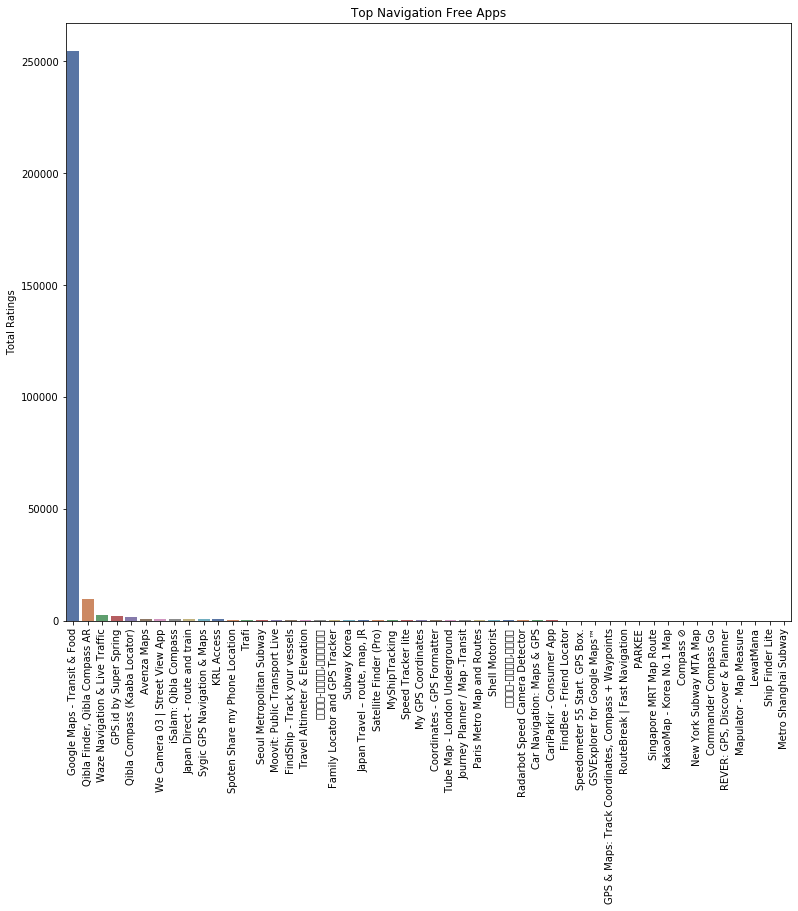

In [115]:
#top free Navigation
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_navigation_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Navigation Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [116]:
#top paid Photo & Video
top_paid_photo_apps =df[(df["category"] ==        '                  Photo & Video                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_photo_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

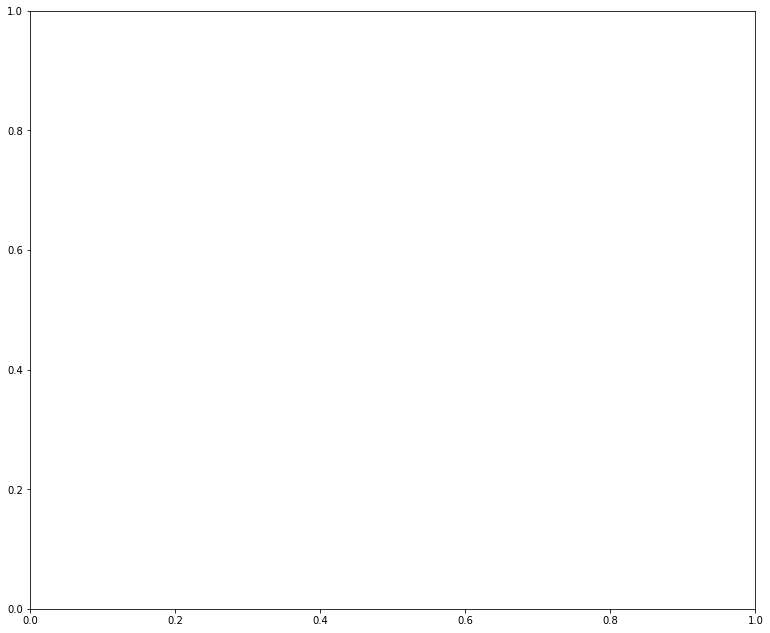

In [117]:
#top paid Photo & Video
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_photo_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Photo & Video Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [118]:
#top free Photo & Video
top_free_photo_apps =df[(df["category"] ==        '                  Photo & Video                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_photo_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
731,1,4.8,Photo & Video,Requires iOS 11.0 or later. Compatible with iP...,"English, Croatian, Czech, Danish, Dutch, Finni...",Instagram,0.0,1.0,1100000.0,123.8,31,True,True
726,1,4.8,Photo & Video,Requires iOS 11.0 or later. Compatible with iP...,"English, Afrikaans, Albanian, Amharic, Arabic,...","YouTube: Watch, Listen, Stream",0.0,2.0,758300.0,205.3,73,True,True
710,4,4.8,Photo & Video,Requires iOS 10.0 or later. Compatible with iP...,"English, French, Indonesian, Italian, Japanese...",Unfold — Create Stories,0.0,11.0,146500.0,139.5,10,True,True
724,4,4.9,Photo & Video,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, French, German, Indonesian, I...",InShot - Video Editor,0.0,4.0,143000.0,113.2,16,True,True
705,4,4.8,Photo & Video,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Dutch, French, German, Hebrew...",FaceApp - AI Face Editor,0.0,147.0,85900.0,133.0,22,True,True
725,4,4.8,Photo & Video,Requires iOS 10.0 or later. Compatible with iP...,"English, Hindi, Japanese, Korean, Portuguese, ...",Camera360-照片编辑&相机美颜&视频拍摄,0.0,47.0,72500.0,275.1,11,True,True
706,4,4.9,Photo & Video,Requires iOS 11.3 or later. Compatible with iP...,"English, Afrikaans, Albanian, Armenian, Azerba...",Canva: Card/Poster/Logo Maker,0.0,13.0,64000.0,308.8,47,True,True
722,1,4.8,Photo & Video,Requires iOS 11.0 or later. Compatible with iP...,"English, Arabic, Armenian, Bengali, Chinese, F...",PicsArt Photo Editor + Collage,0.0,6.0,51300.0,164.8,20,True,True
697,4,4.8,Photo & Video,Requires iOS 11.0 or later. Compatible with iP...,"English, Chinese, Indonesian, Russian, Spanish",Storybeat,0.0,5.0,48600.0,46.5,5,True,True
714,4,4.9,Photo & Video,Requires iOS 9.0 or later. Compatible with iPh...,"English, Hindi, Indonesian, Japanese, Korean, ...","BeautyPlus -Snap, Edit, Filter",0.0,29.0,46300.0,218.6,13,True,True


Text(0.5, 0, '')

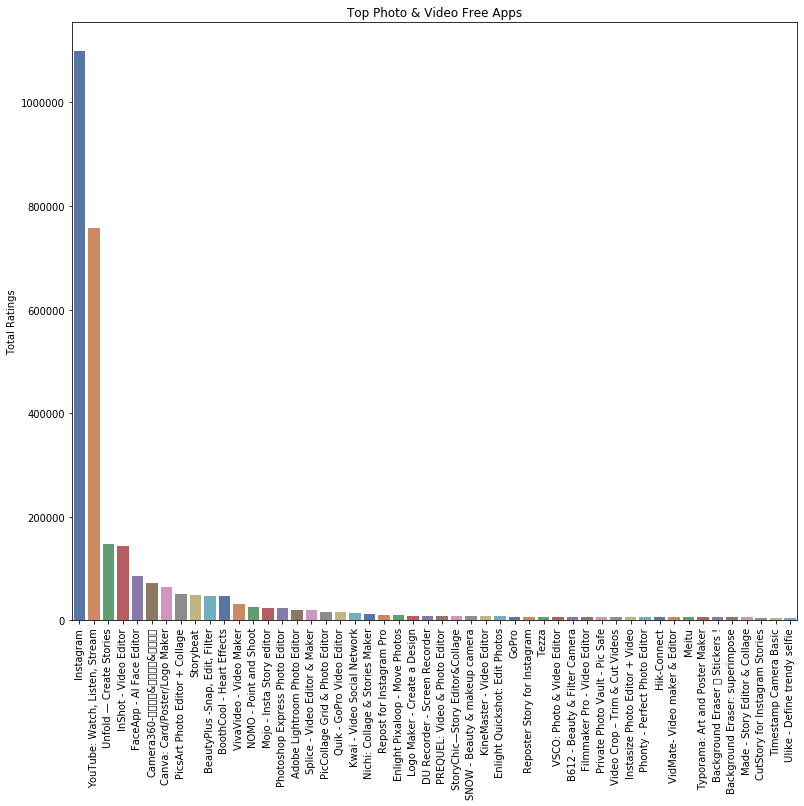

In [120]:
#top free Photo & Video
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_photo_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Photo & Video Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [121]:
#top paid Reference
top_paid_reference_apps =df[(df["category"] ==        '                  Reference                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_reference_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
118,4,4.9,Reference,Requires iOS 9.3 and watchOS 2.0 or later. Com...,"English, Arabic, Bengali, Dutch, French, Germa...",Quran Majeed Proالقرآن المجيد,75000.0,6.0,1800.0,185.2,21,True,False
102,4,4.7,Reference,Requires iOS 10.3 or later. Compatible with iP...,"English, Arabic",iQuran Pro,45000.0,3.0,873.0,209.0,2,True,False
23,4,4.7,Reference,Requires iOS 9.0 and watchOS 2.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Speak & Translate: Translator,299000.0,8.0,459.0,85.6,19,True,False
46,4,4.6,Reference,Requires iOS 3.2 or later. Compatible with iPad.,"English, Arabic",iQuran HD,29000.0,NaN,342.0,78.2,2,False,False
40,4,3.2,Reference,Requires iOS 8.0 or later. Compatible with iPh...,English,Al Quran Digital,15000.0,7.0,17.0,166.6,1,True,False
47,4,3.6,Reference,Requires iOS 6.0 or later. Compatible with iPh...,English,Kamus Lengkap Pro,59000.0,9.0,5.0,16.7,1,True,False


Text(0.5, 0, '')

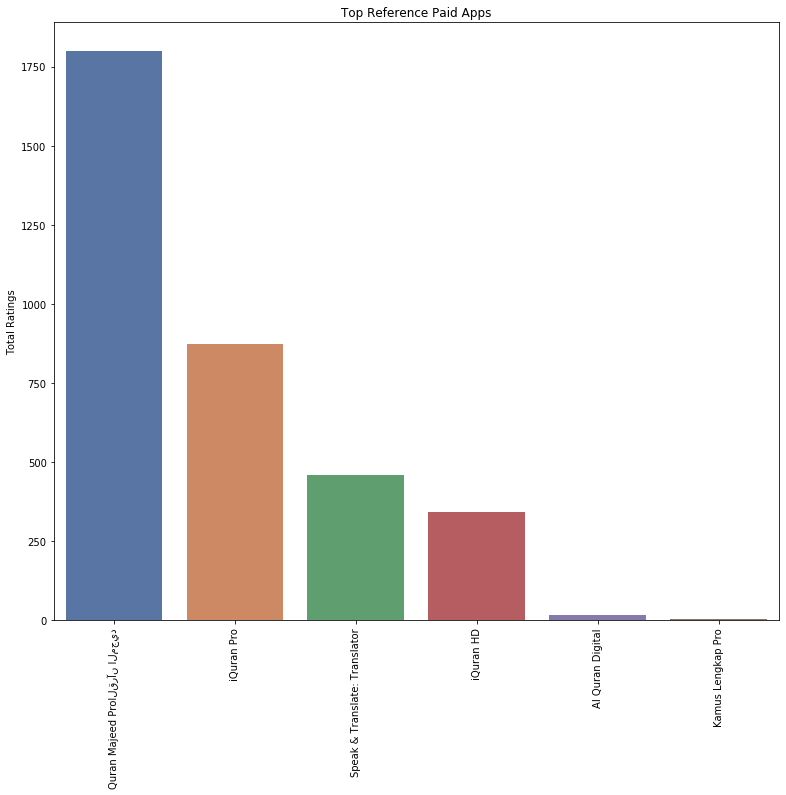

In [122]:
#top paid Reference
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_reference_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Reference Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [123]:
#top free Reference
top_free_reference_apps =df[(df["category"] ==        '                  Reference                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_reference_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
252,1,4.9,Reference,Requires iOS 9.0 and watchOS 2.2 or later. Com...,"English, Arabic, Azerbaijani, Bengali, Danish,...","Muslim Pro: Azan, Quran, Qibla",0.0,2.0,309000.0,160.3,22,True,True
251,4,4.9,Reference,Requires iOS 11.0 and watchOS 2.0 or later. Co...,"English, Afrikaans, Albanian, Arabic, Belarusi...",Bible,0.0,3.0,38900.0,139.7,55,True,True
242,4,4.8,Reference,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Bosnian, Catalan, Ch...",Quran Al Kareem القرآن الكريم,0.0,15.0,20200.0,106.8,35,True,True
238,4,4.9,Reference,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bosnian, Croatian, Danish, Fr...",Quran Pro Muslim القرآن الكريم,0.0,13.0,14800.0,121.7,20,True,True
241,1,4.8,Reference,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, French, German, Hindi, Indone...",U-Dictionary,0.0,5.0,7300.0,128.2,16,True,True
234,4,4.9,Reference,Requires iOS 9.3 and watchOS 2.0 or later. Com...,"English, Arabic, Bengali, Dutch, French, Germa...",Quran Majeed – القرآن المجيد,0.0,28.0,6700.0,189.2,21,True,True
249,4,4.7,Reference,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",Quranesia,0.0,52.0,3800.0,299.1,2,True,True
250,4,4.6,Reference,Requires iOS 11.0 or later. Compatible with iP...,"English, Albanian, Arabic, Armenian, Azerbaija...",Google Translate,0.0,1.0,2700.0,80.1,60,True,True
196,4,4.8,Reference,Requires iOS 9.0 and watchOS 3.2 or later. Com...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Translate Now - Translator,0.0,21.0,2300.0,227.4,33,True,True
204,4,4.8,Reference,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Bengali, Bosnian, Chinese, Fr...",Quran Tajweed Pro | مصحف تجويد,0.0,NaN,1700.0,89.5,16,False,True


Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20892 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

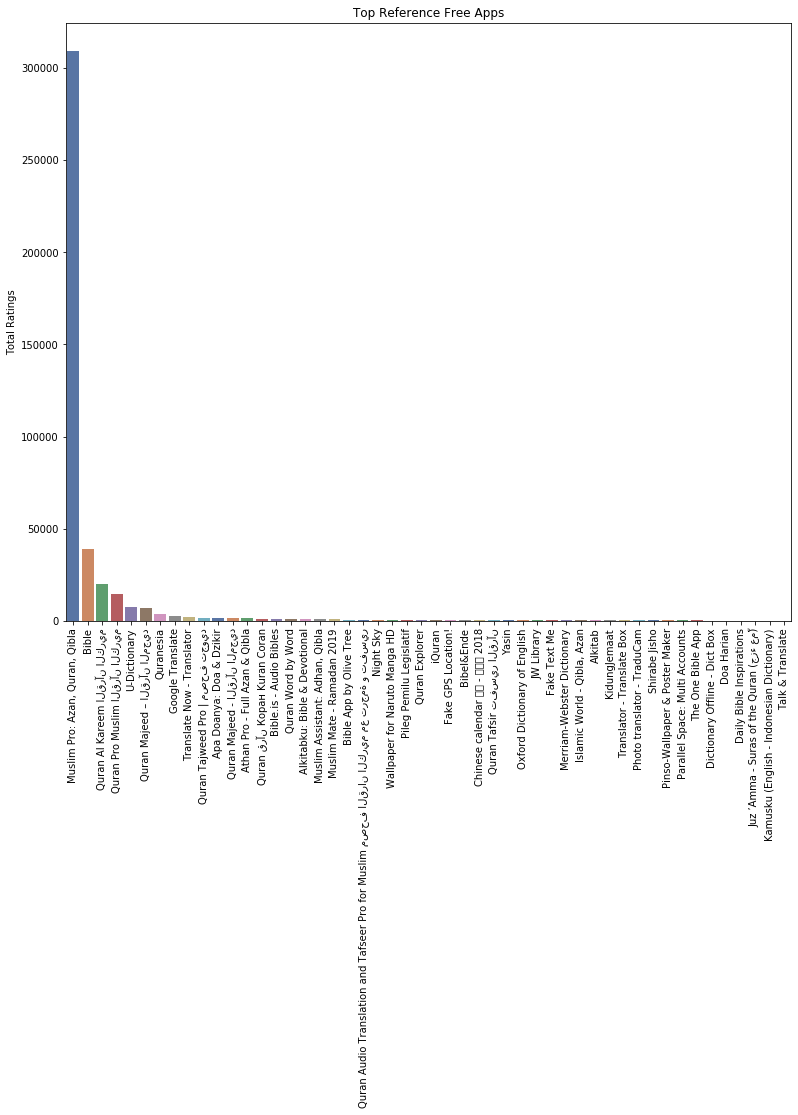

In [124]:
#top free Reference
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_reference_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Reference Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [125]:
#top paid Sports
top_paid_sports_apps =df[(df["category"] ==        '                  Sports                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_sports_apps.head(10)







,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not


ValueError: min() arg is an empty sequence

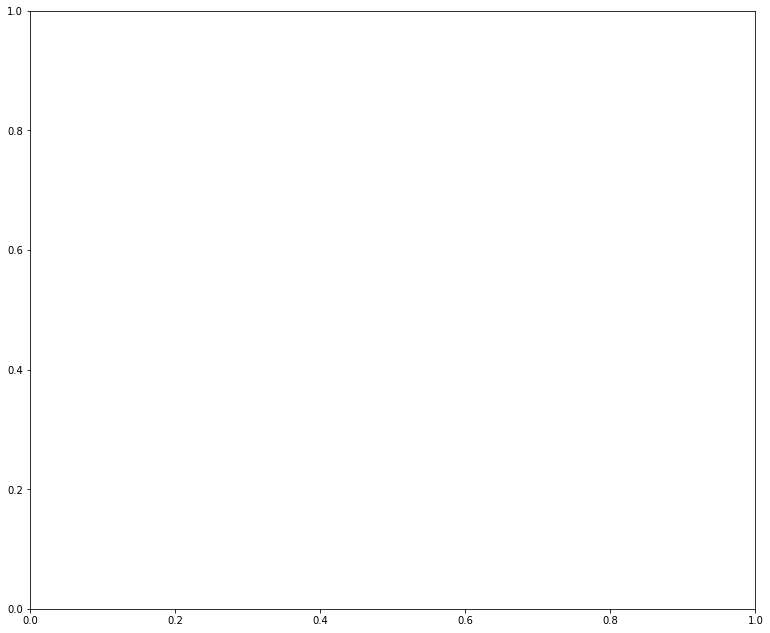

In [126]:
#top paid Sports
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_sports_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Sports Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [127]:
#top free Sports
top_free_sports_apps =df[(df["category"] ==        '                  Sports                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_sports_apps.head(10)




,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4967,1,4.9,Sports,Requires iOS 9.0 or later. Compatible with iPh...,English,Premier League - Official App,0.0,3.0,13400.0,117.4,1,True,True
4955,4,4.8,Sports,Requires iOS 9.0 or later. Compatible with iPh...,English,LiveScore: World Football 2018,0.0,70.0,2100.0,65.7,1,True,True
4968,4,4.8,Sports,Requires iOS 9.0 or later. Compatible with iPh...,English,LiveScore: Live Sport Updates,0.0,1.0,1900.0,51.8,1,True,True
4948,4,4.9,Sports,Requires iOS 10.0 or later. Compatible with iP...,"English, Simplified Chinese",Manchester United Official App,0.0,12.0,1800.0,178.7,2,True,True
4964,1,4.8,Sports,Requires iOS 11.0 or later. Compatible with iP...,"English, Catalan, Croatian, Czech, Danish, Dut...",FlashScore - live scores,0.0,4.0,1400.0,62.5,30,True,True
4969,4,4.7,Sports,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Bosnian, Croatian, Dutch, Fre...",Goal Live Scores,0.0,8.0,1400.0,162.7,19,True,True
4959,1,4.8,Sports,Requires iOS 11.0 and watchOS 3.0 or later. Co...,"English, Dutch, French, German, Italian, Korea...",Onefootball - Football Scores,0.0,20.0,1200.0,103.9,11,True,True
4970,4,4.3,Sports,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Bosnian, Croatian, Dutch, Fre...",Goal.com,0.0,14.0,725.0,162.7,19,True,True
4961,1,4.9,Sports,Requires iOS 11.0 and watchOS 4.0 or later. Co...,"English, Albanian, Azerbaijani, Bulgarian, Cat...",SofaScore Live Sports Results,0.0,2.0,688.0,101.2,33,True,True
4950,4,4.8,Sports,Requires iOS 11.0 and watchOS 3.0 or later. Co...,"English, Arabic, Burmese, Danish, Dutch, Finni...",Football Scores - FotMob,0.0,29.0,639.0,136.3,25,True,True


Text(0.5, 0, '')

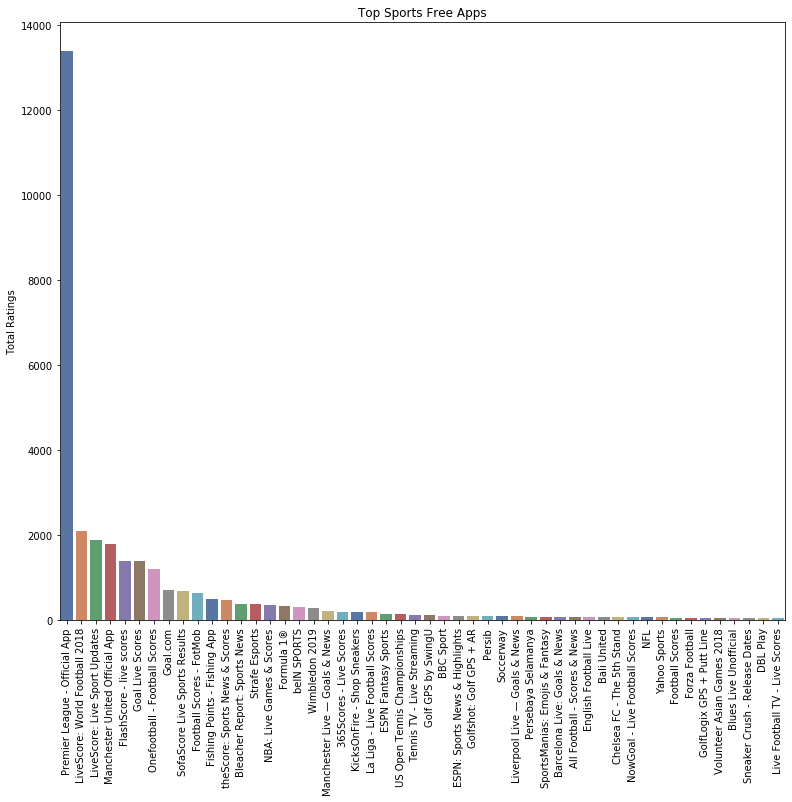

In [128]:
#top free Sports
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_sports_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Sports Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [129]:
#top paid Utilities
top_paid_utilities_apps =df[(df["category"] ==        '                  Utilities                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_utilities_apps.head(10)








,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4550,4,4.6,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, Thai",Pastel Keyboard Themes Color,15000.0,20.0,232.0,192.3,2,True,False


Text(0.5, 0, '')

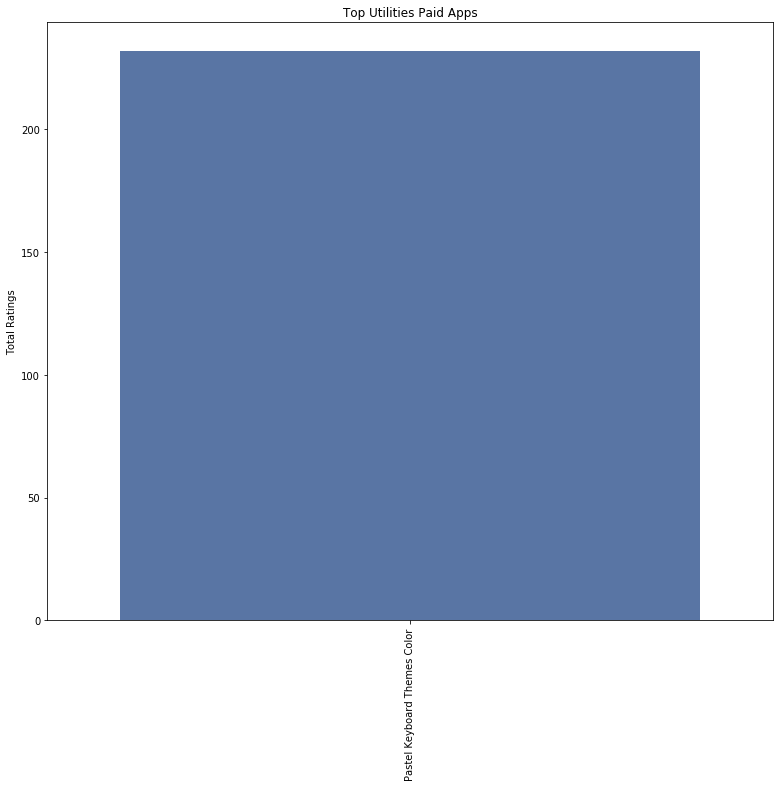

In [130]:
#top paid Utilities
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_utilities_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Utilities Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [131]:
#top free Utilities
top_free_utilities_apps =df[(df["category"] ==        '                  Utilities                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_utilities_apps.head(10)





,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4740,4,4.3,Utilities,Requires iOS 11.0 or later. Compatible with iP...,"English, Indonesian",MyTelkomsel,0.0,1.0,137200.0,353.5,2,True,True
4724,4,4.8,Utilities,Requires iOS 10.3 or later. Compatible with iP...,"English, Armenian, Czech, Dutch, French, Germa...",1.1.1.1: Faster Internet,0.0,11.0,29700.0,106.5,17,True,True
4729,1,4.7,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, Arabic, Catalan, Croatian, Czech, Dan...",Aloha Browser - private & fast,0.0,23.0,26100.0,139.4,34,True,True
4736,4,4.2,Utilities,Requires iOS 9.0 or later. Compatible with iPh...,"English, Indonesian",myIM3,0.0,7.0,21100.0,85.3,2,True,True
4733,4,4.7,Utilities,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Danish, Dutch, Finnish, French, Germa...",The Calculator,0.0,157.0,14600.0,151.1,22,True,True
4690,1,4.8,Utilities,Requires iOS 11.0 or later. Compatible with iP...,English,Sticker Maker for Studio !,0.0,58.0,12900.0,45.0,1,True,True
4728,4,4.7,Utilities,Requires iOS 10.3 or later. Compatible with iP...,"English, Afrikaans, Arabic, Armenian, Azerbaij...",Getcontact,0.0,18.0,12200.0,153.3,54,True,True
4722,4,4.7,Utilities,Requires iOS 9.0 and watchOS 3.1 or later. Com...,"English, Albanian, Arabic, Catalan, Czech, Dan...",Battery Life,0.0,66.0,8200.0,55.4,33,True,True
4704,4,4.8,Utilities,Requires iOS 8.0 or later. Compatible with iPh...,"English, Arabic, Catalan, Chinese (Hong Kong),...",TestFlight,0.0,85.0,7300.0,36.0,34,True,True
4695,4,4.7,Utilities,Requires iOS 10.0 or later. Compatible with iP...,"English, German, Italian, Japanese, Korean, Po...",Sticker Maker Stickers Creator,0.0,21.0,4900.0,186.2,9,True,True


Text(0.5, 0, '')

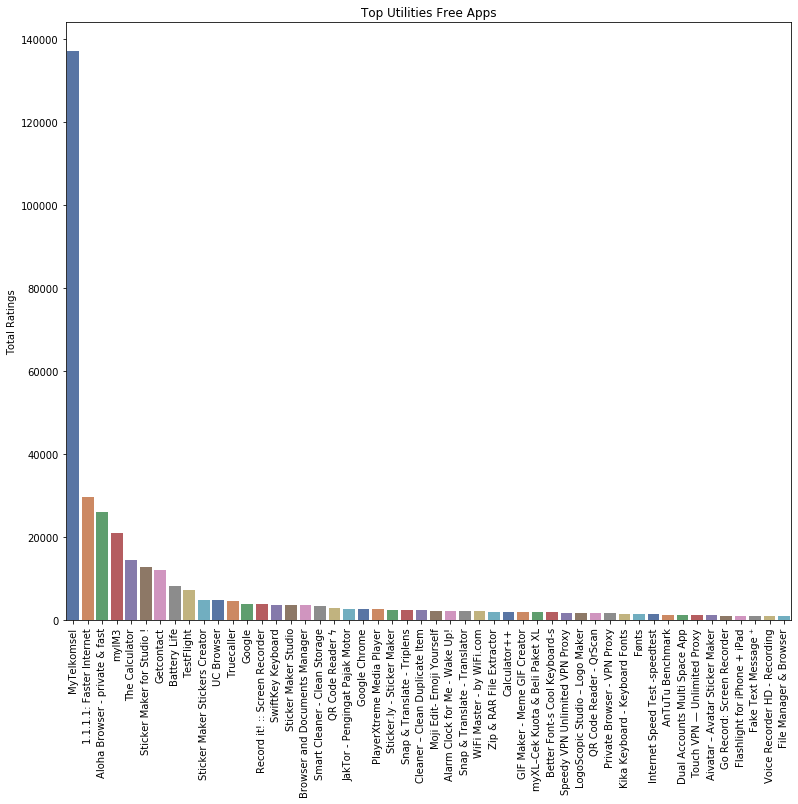

In [132]:
#top free Utilities
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_utilities_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Utilities Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [133]:
#top paid Weather
top_paid_weather_apps =df[(df["category"] ==        '                  Weather                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_weather_apps.head(10)









,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4198,4,4.7,Weather,Requires iOS 8.0 and watchOS 3.0 or later. Com...,"English, Danish, French, German, Indonesian, I...",Weather Radar: Forecast,75000.0,4.0,111.0,96.2,18,True,False
4229,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather+,59000.0,3.0,91.0,136.1,11,True,False
4068,4,4.6,Weather,Requires iOS 9.0 or later. Compatible with iPh...,"English, Danish, Dutch, Finnish, French, Germa...",Weather Radar⁺,59000.0,10.0,17.0,63.8,14,True,False
4131,1,4.9,Weather,Requires iOS 12.0 and watchOS 4.0 or later. Co...,English,CARROT Weather,75000.0,2.0,17.0,152.8,1,True,False
4215,4,4.9,Weather,Requires iOS 10.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Living Earth - Clock & Weather,75000.0,1.0,17.0,177.9,11,True,False
4118,4,4.8,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Danish, Dutch, Finnish, French, Germa...",WeatherPro,5000.0,5.0,14.0,104.0,12,True,False
4169,4,5.0,Weather,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Chinese, Dutch, French, Germa...",Weather HD - by Clear Day,59000.0,8.0,11.0,396.1,13,True,False
4160,4,2.3,Weather,Requires iOS 10.0 and watchOS 4.0 or later. Co...,"English, Danish, Dutch, Finnish, French, Germa...",AeroWeather Pro,59000.0,6.0,3.0,118.0,15,True,False
4101,4,5.0,Weather,Requires iOS 8.0 or later. Compatible with iPh...,"English, Catalan, Czech, Danish, Dutch, French...",Earthquake - worldwide coverage of natural dis...,29000.0,7.0,1.0,13.2,24,True,False


Text(0.5, 0, '')

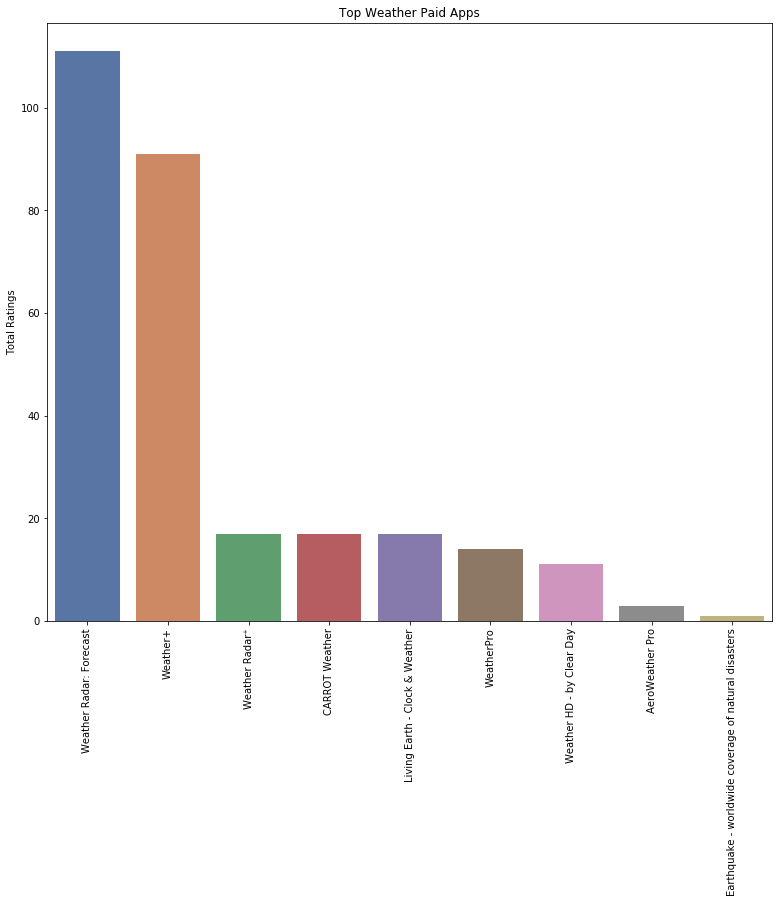

In [134]:
#top paid Weather
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_weather_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Weather Paid Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [135]:
#top free Weather
top_free_weather_apps =df[(df["category"] ==        '                  Weather                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_weather_apps.head(10)






,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
4263,4,4.8,Weather,Requires iOS 11.0 and watchOS 4.3 or later. Co...,"English, Arabic, Azerbaijani, Bulgarian, Catal...",AccuWeather Live Weather Radar,0.0,3.0,3300.0,223.0,44,True,True
4261,4,4.6,Weather,Requires iOS 11.0 and watchOS 4.0 or later. Co...,"English, Danish, French, German, Indonesian, I...",Weather Radar Live - Forecast,0.0,15.0,2300.0,233.9,18,True,True
4258,4,4.8,Weather,Requires iOS 10.0 and watchOS 3.0 or later. Co...,"English, Dutch, French, German, Greek, Hungari...",Earthquake,0.0,16.0,2200.0,85.1,16,True,True
4266,4,4.6,Weather,Requires iOS 10.0 and watchOS 3.0 or later. Co...,"English, Danish, Dutch, French, German, Indone...",Weather Live°,0.0,5.0,2100.0,152.9,20,True,True
4265,4,4.9,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Arabic, French, German, Indonesian, J...",AirVisual Air Quality Forecast,0.0,4.0,2100.0,158.0,17,True,True
4260,4,4.6,Weather,Requires iOS 12.0 and watchOS 5.0 or later. Co...,"English, Afrikaans, Bosnian, Bulgarian, Croati...",Weather & Radar,0.0,18.0,1700.0,206.0,28,True,True
4252,4,4.8,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Danish, Dutch, Finnish, French, Germa...",Tide Charts Near Me,0.0,9.0,1200.0,106.2,21,True,True
4256,4,4.7,Weather,Requires iOS 10.0 or later. Compatible with iP...,"English, Dutch, French, German, Italian, Japan...",Weather ·,0.0,11.0,647.0,124.0,12,True,True
4259,4,4.7,Weather,Requires iOS 9.0 and watchOS 3.0 or later. Com...,"English, Dutch, French, German, Italian, Japan...",Weather⁺,0.0,102.0,509.0,158.1,11,True,True
4272,4,4.3,Weather,Requires iOS 8.0 or later. Compatible with iPh...,English,Info BMKG,0.0,1.0,502.0,13.9,1,True,True


Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1630 missing from current font.
  font.set_text(s, 0, flags=flags)


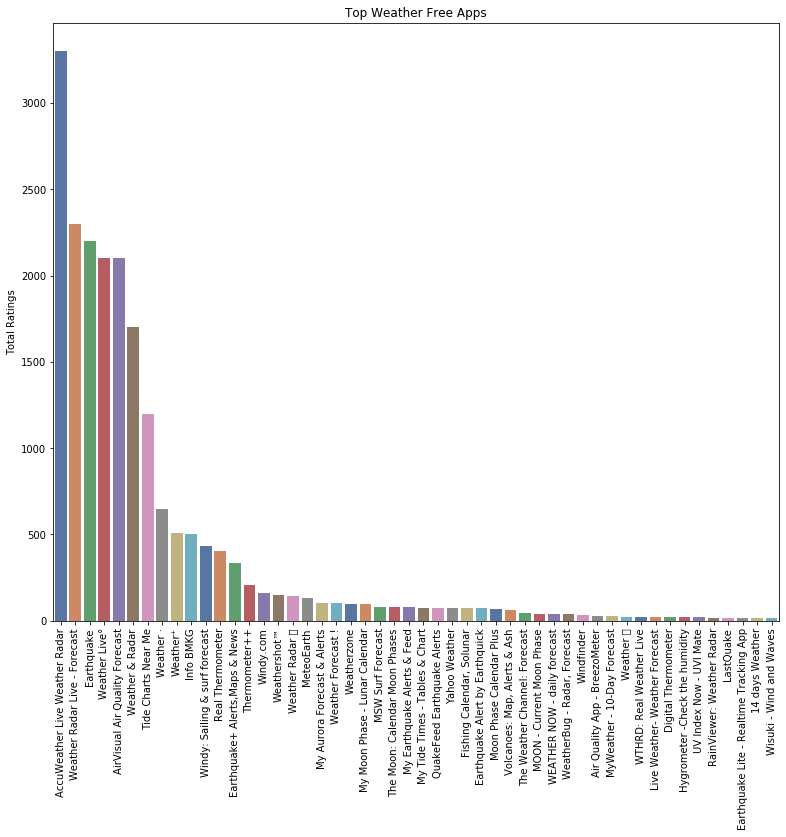

In [136]:
#top free Weather
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_weather_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Top Weather Free Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [137]:
df[df['price']!=0].groupby('price').agg({'rating_count':'mean'}).sort_values(by='rating_count').reset_index()

,price,rating_count
0,249000.0,7.000000
1,89000.0,12.000000
2,5000.0,14.000000
3,29000.0,116.000000
4,59000.0,122.857143
5,15000.0,124.500000
6,75000.0,342.166667
7,299000.0,459.000000
8,45000.0,873.000000
9,219000.0,1100.000000


Text(0.5, 1.0, 'Average No. Ratings in Paid Apps')

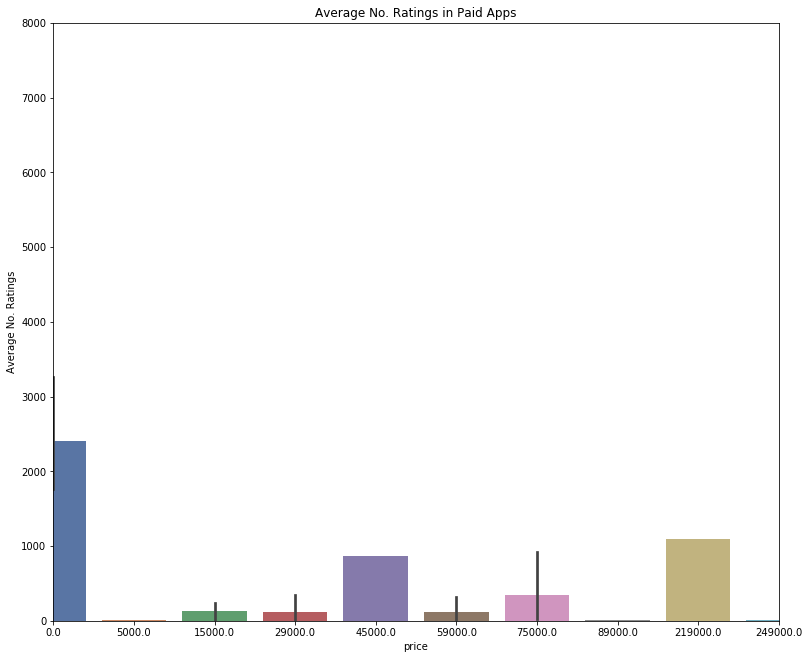

In [139]:

a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(x='price',y='rating_count',data=df,palette='deep')
plt.xlim(0,9) 
plt.ylim(0,8000)
plt.ylabel("Average No. Ratings")
plt.title("Average No. Ratings in Paid Apps")

In [140]:

df[df['price']== '0'].groupby('price').agg({'rating_count':'mean'})

,rating_count
price,


In [113]:
import statsmodels.formula.api as sm

In [114]:
result = sm.ols(formula=" rank ~ rating_count", data=tga).fit()

In [115]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.35
Date:                Wed, 27 May 2020   Prob (F-statistic):           7.55e-05
Time:                        22:33:10   Log-Likelihood:                -1087.0
No. Observations:                 200   AIC:                             2178.
Df Residuals:                     198   BIC:                             2185.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      103.4715      4.011     25.795   

In [131]:
import statsmodels.formula.api as sm

In [135]:
result3 = sm.ols(formula =" rank ~ rating_count + price", data=tga112).fit()

In [136]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                 -0.550
Method:                 Least Squares   F-statistic:                    0.4676
Date:                Wed, 27 May 2020   Prob (F-statistic):              0.719
Time:                        22:50:21   Log-Likelihood:                -13.498
No. Observations:                   4   AIC:                             33.00
Df Residuals:                       1   BIC:                             31.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      184.9893     10.002     18.495   

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


In [32]:
import statsmodels.formula.api as sm

In [34]:
result = sm.ols(formula="rankpaid ~ rankgrossing + price + app_rating + rating_count + size", data=df).fit()

In [35]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               rankpaid   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     7.085
Date:                Fri, 29 May 2020   Prob (F-statistic):           0.000803
Time:                        03:01:06   Log-Likelihood:                -67.433
No. Observations:                  24   AIC:                             146.9
Df Residuals:                      18   BIC:                             153.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.0045      5.629      4.798   

In [22]:
df.head(20)

,age_rating,app_rating,category,compatibility,languages,name,price,rank,rating_count,size,num_languages,boolean_rank,free_or_not
0,4,3.0,Books,Requires iOS 8.0 or later. Compatible with iPh...,English,"Beauty Secrets, Tips For Women",0.0,NaN,1.0,14.3,1,False,True
1,4,4.7,Business,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Portuguese, ...",GoToMeeting,0.0,191.0,9.0,148.0,7,True,True
2,4,2.6,Finance,Requires iOS 9.0 or later. Compatible with iPh...,nan,OctaFX cTrader,0.0,166.0,5.0,190.1,0,True,True
3,4,4.5,Entertainment,Requires iOS 11.0 or later. Compatible with iP...,"English, French, German, Italian, Japanese, Ko...",Live Wallpapers & ASMR Studio,0.0,NaN,768.0,113.0,11,False,True
4,4,4.6,Education,Requires iOS 11.0 or later. Compatible with iP...,English,Space 4D+,0.0,NaN,12.0,245.7,1,False,True
5,9,4.6,Games,Requires iOS 9.0 or later. Compatible with iPh...,"English, French, German, Italian, Japanese, Ko...",Yu-Gi-Oh! Duel Links,0.0,27.0,898.0,201.3,11,True,True
6,4,0.0,Food & Drink,Requires iOS 7.0 or later. Compatible with iPh...,English,Resep Daging Indonesia,0.0,NaN,0.0,19.5,1,False,True
7,4,3.9,Lifestyle,Requires iOS 9.0 or later. Compatible with iPh...,"English, Arabic, Czech, Finnish, French, Germa...",FunDo Pro,0.0,134.0,79.0,185.6,18,True,True
8,1,5.0,Medical,Requires iOS 10.3 or later. Compatible with iP...,English,Pocket Pharmacist,0.0,NaN,1.0,64.7,1,False,True
9,1,5.0,Health & Fitness ...,Requires iOS 8.0 or later. Compatible with iPh...,"English, Dutch, French, German, Italian, Russi...",Calorie-Calculator,0.0,NaN,2.0,16.7,7,False,True


In [ ]:
df = df.sort_values(by='Reviews',ascending=False)

In [ ]:
df = df[(df["Category"] != '  ') & (df["Installs"]!='')].sort_values(by='Reviews',ascending=False)
df.head(30)